# Load data

In [14]:
import pandas as pd


df_analysis=pd.read_csv(r'data\US_data\df_merged_data_for_analysis.csv')
df_weight = pd.read_csv('data/US_data/df_weight.csv')

# df_economic = pd.read_csv('data/US_data/df_economic.csv')



# # 环境维度的变量
# env_data = df_analysis[['lat', 'lon', 'predicted_prob','gmm_density','sample_type']].copy()

# # 碳减排维度的变量

# emission_data = df_analysis[['lat', 'lon', 'Expectation_net_benefit','area_m2']].copy()
# emission_data['Expectation_net_benefit'] = emission_data['Expectation_net_benefit'] * 3.67  # 单位变为MgCO2也就是吨
# emission_data = emission_data.rename(columns={'Expectation_net_benefit': 'Expectation_net_benefit'})

# # 经济维度的变量
# avg_npv = economic_2050.groupby(['lat', 'lon'])['net_npv_usd'].mean().reset_index().rename(columns={'net_npv_usd': 'avg_npv'})


# # 合并所有变量
# merged_data_for_plot = env_data.merge(emission_data, on=['lat', 'lon'], how='outer') \
#                       .merge(avg_npv, on=['lat', 'lon'], how='outer')
# merged_data_for_plot
df_analysis

,lat,lon,predicted_prob,gmm_density,sample_type,LNCS_expect,net_npv_usd,area_m2,E_yr_pixel,pv_potential_dens,power_generation_kwha,Expectation_net_benefit,ccd_optimized
0,25.295834,-80.287500,0.902568,2.806133e+19,prediction,811.854595,411724.028993,776295.361002,1.958127e+08,5568.344207,7.567199e+07,4756.489612,0.940305
1,25.437500,-80.537500,0.997976,5.399806e+21,prediction,1348.189022,287052.220262,775385.854124,1.913273e+08,5447.174926,7.402534e+07,4098.985904,0.828012
2,25.437500,-80.495834,0.995833,1.508036e+20,prediction,971.186274,278019.855286,775385.854124,1.910215e+08,5438.469092,7.390703e+07,4467.282818,0.882208
3,25.445833,-80.454170,0.990886,1.800785e+16,prediction,972.811005,272893.696918,775332.207938,1.908320e+08,5433.449375,7.383881e+07,4460.638370,0.880366
4,25.445833,-80.404170,0.996591,6.792866e+22,prediction,968.544647,294800.434504,775332.207938,1.915894e+08,5455.012162,7.413184e+07,4486.467516,0.888518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,48.995834,-99.995834,0.914557,5.692829e+14,prediction,377.830800,-556486.868714,563356.382622,1.180457e+08,4625.717362,6.286200e+07,4247.886562,0.790359
70333,48.995834,-99.987500,0.921603,1.413612e+14,prediction,307.516600,-562376.609379,563356.382622,1.178997e+08,4619.997412,6.278426e+07,4312.480812,0.800732
70334,48.995834,-99.895836,0.872176,3.161397e+13,prediction,324.674320,-598319.346882,563356.382622,1.170071e+08,4585.017928,6.230891e+07,4260.343608,0.757385
70335,48.995834,-99.887500,0.799749,6.767585e+13,prediction,323.374660,-594934.043507,563356.382622,1.170906e+08,4588.290785,6.235338e+07,4264.916125,0.691242


In [15]:
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO



us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')

# 2. 读取DEM并设置CRS（如果缺失）
dem = rioxarray.open_rasterio(r'figure\draw_shp\DEM.nc', masked=True)

# 检查DEM的CRS，如果缺失则手动设置
if dem.rio.crs is None:
    # 根据DEM数据的坐标范围判断，通常全球DEM使用EPSG:4326
    print("DEM CRS缺失，设置为EPSG:4326")
    dem = dem.rio.write_crs("EPSG:4326")

# 3. 确保US nation的CRS与DEM一致
if us_nation.crs != dem.rio.crs:
    print(f"转换US nation CRS从 {us_nation.crs} 到 {dem.rio.crs}")
    us_nation = us_nation.to_crs(dem.rio.crs)



# 4. 用us_nation精确裁剪DEM
print("开始裁剪DEM（使用us_nation）...")
dem_us = dem.rio.clip(us_nation.geometry.apply(mapping), us_nation.crs, drop=True)
print("DEM裁剪完成！")





DEM CRS缺失，设置为EPSG:4326
转换US nation CRS从 EPSG:4269 到 EPSG:4326
开始裁剪DEM（使用us_nation）...
DEM裁剪完成！


# 1、Plot for bi-variable

## Help function

In [16]:


def _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv):
    """绘制经纬度网格，标签显示在上方和右方（曲线网格）"""
    def extent_lonlat_from_axes(ax, pad_deg=3):
        xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
        xs = np.linspace(xmin, xmax, 512)
        ys = np.linspace(ymin, ymax, 512)
        
        b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
        t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
        l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
        r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
        lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
        lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
        lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
        lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
        return (lon_min, lon_max), (lat_min, lat_max)

    def _project_xy(xy):
        xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
        return np.column_stack([xs, ys])

    # 轴框与四边
    xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
    frame = box(xmin, ymin, xmax, ymax)

    # 获取经纬度范围
    lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

    # 经度刻度和网格线（曲线）
    xticks = []
    for i, lon in enumerate(lon_ticks):
        lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
        xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
        line = LineString(xy)

        # 只绘制地图内的曲线网格线，裁剪到地图区域
        clip_line = line.intersection(frame)
        if not clip_line.is_empty and clip_line.geom_type == 'LineString':
            coords = list(clip_line.coords)
            if len(coords) > 1:
                coords_array = np.array(coords)
                ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在顶部边界寻找交点
        top_edge = LineString([(xmin, ymax), (xmax, ymax)])
        intersection = line.intersection(top_edge)
        
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                xticks.append(intersection.x)
                ax.text(intersection.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                       ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                               edgecolor='none'))
            elif intersection.geom_type == 'MultiPoint':
                # 如果交点有多个，选择最左侧的
                points = list(intersection.geoms)
                if points:
                    x_coords = [p.x for p in points]
                    min_x_idx = np.argmin(x_coords)
                    xticks.append(points[min_x_idx].x)
                    ax.text(points[min_x_idx].x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                           ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                                   edgecolor='none'))

    # 纬度刻度和网格线（曲线）
    yticks = []
    for lat in lat_ticks:
        lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
        xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
        line = LineString(xy)

        # 只绘制地图内的曲线网格线
        clip_line = line.intersection(frame)
        if not clip_line.is_empty and clip_line.geom_type == 'LineString':
            coords = list(clip_line.coords)
            if len(coords) > 1:
                coords_array = np.array(coords)
                ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在左侧边界寻找交点
        left_edge = LineString([(xmin, ymin), (xmin, ymax)])
        intersection = line.intersection(left_edge)
        
        if not intersection.is_empty:
            if intersection.geom_type == 'Point':
                yticks.append(intersection.y)
                ax.text(xmin - (xmax - xmin) * 0.02, intersection.y, f"{int(round(lat))}°N",
                       ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                               edgecolor='none'))
            elif intersection.geom_type == 'MultiPoint':
                # 如果交点有多个，选择中间的
                points = list(intersection.geoms)
                if points:
                    mid_idx = len(points) // 2
                    yticks.append(points[mid_idx].y)
                    ax.text(xmin - (xmax - xmin) * 0.02, points[mid_idx].y, f"{int(round(lat))}°N",
                           ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                                   edgecolor='none'))
    """绘制经纬度网格，标签显示在上方和左侧（曲线网格，去除右侧标签）"""
    def extent_lonlat_from_axes(ax, pad_deg=3):
        xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
        xs = np.linspace(xmin, xmax, 512)
        ys = np.linspace(ymin, ymax, 512)
        
        b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
        t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
        l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
        r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
        lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
        lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
        lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
        lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
        return (lon_min, lon_max), (lat_min, lat_max)

    def _project_xy(xy):
        xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
        return np.column_stack([xs, ys])

    def _choose_point_on_edge(geom):
        if geom.is_empty:
            return None
        if geom.geom_type == "Point":
            return geom
        if geom.geom_type.startswith("Multi") or geom.geom_type == "GeometryCollection":
            pts = [g for g in getattr(geom, "geoms", []) if g.geom_type == "Point"]
            return pts[0] if pts else None
        if geom.geom_type == "LineString":
            return geom.interpolate(0.5, normalized=True)
        return None

    # 轴框与四边
    xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
    frame = box(xmin, ymin, xmax, ymax)
    left = LineString([(xmin, ymin), (xmin, ymax)])
    right = LineString([(xmax, ymin), (xmax, ymax)])  
    bottom = LineString([(xmin, ymin), (xmax, ymin)])
    top = LineString([(xmin, ymax), (xmax, ymax)])

    # 获取经纬度范围
    lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

    # 经度刻度和网格线（曲线）
    xticks = []
    for i, lon in enumerate(lon_ticks):
        lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
        xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
        line = LineString(xy)

        # 绘制曲线网格线
        ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 在顶部显示标签
        p = _choose_point_on_edge(line.intersection(top))
        if p is None:
            p = _choose_point_on_edge(line.intersection(bottom))
        if p is not None:
            # 检查与已有标签的最小距离
            min_distance = 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])
            if not xticks or min([abs(p.x - x) for x in xticks]) > min_distance:
                xticks.append(p.x)
                # 在上方显示标签
                ax.text(p.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
                       ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
                               edgecolor='none'))

    # 纬度刻度和网格线（曲线）
    yticks = []
    for lat in lat_ticks:
        lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
        xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
        line = LineString(xy)

        # 绘制曲线网格线
        ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

        # 只在左侧显示标签（不在右侧）
        p = _choose_point_on_edge(line.intersection(left))
        if p is not None:
            yticks.append(p.y)
            ax.text(xmin - (xmax - xmin) * 0.02, p.y, f"{int(round(lat))}°N",
                   ha='right', va='center', fontsize=5, zorder=20, color='#666666',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
                           edgecolor='none'))



def _render_terrain(ax, dem_data, usa_bounds_main, transformer):
    """渲染地形"""
    qm = None
    dem_lon = dem_data.x.values
    dem_lat = dem_data.y.values
    lon_mask = (dem_lon >= usa_bounds_main['lon_min']) & (dem_lon <= usa_bounds_main['lon_max'])
    lat_mask = (dem_lat >= usa_bounds_main['lat_min']) & (dem_lat <= usa_bounds_main['lat_max'])
    
    if lon_mask.any() and lat_mask.any():
        lon_idx = np.where(lon_mask)[0]
        lat_idx = np.where(lat_mask)[0]
        
        # 抽稀栅格
        step_x = max(1, len(lon_idx)//1800)
        step_y = max(1, len(lat_idx)//900)
        lon_sub = lon_idx[::step_x]
        lat_sub = lat_idx[::step_y]
        elev = dem_data.squeeze().values[np.ix_(lat_sub, lon_sub)]

        mask = ~np.isnan(elev)
        if mask.any():
            lo = np.nanpercentile(elev, 35)
            elev[elev < lo] = np.nan

            # 地形配色
            terrain_colors = ListedColormap(["#ffffff", "#eef3ef", "#dfe8e0",
                                           "#d2ddcf", "#c7d1c1", "#b7c2af"])
            terrain_colors.set_bad((0, 0, 0, 0))
            qs = np.nanpercentile(elev, [35, 50, 65, 78, 88, 98])
            norm = BoundaryNorm(qs, terrain_colors.N)

            lon_grid, lat_grid = np.meshgrid(dem_lon[lon_sub], dem_lat[lat_sub])
            gx, gy = transformer.transform(lon_grid, lat_grid)            
            qm = ax.pcolormesh(gx, gy, elev, cmap=terrain_colors, norm=norm,
                              shading='auto', alpha=0.55, antialiased=False, zorder=1)
            qm.set_clip_on(True)
    
    return qm


def _draw_glow_outline_outside(ax, gdf_albers, line_color="#444444", line_width=0.8,
                              widths_km=(0, 30, 50), alphas=(0.95, 0.5, 0.3), 
                              colors=("#08336e", "#105ca4", "#3888c0")):
    """绘制国界线光晕效果"""
    g = gdf_albers.copy()
    geom = unary_union(g.geometry)
    
    if make_valid is not None:
        geom = make_valid(geom)
    else:
        geom = geom.buffer(0)

    radii_m = [k*1000.0 for k in widths_km]
    ordered = list(zip(radii_m, alphas, colors))
    ordered.sort(key=lambda x: x[0])

    last_inner = geom.buffer(0, join_style=2, cap_style=2)
    glow_meshes = []
    
    for i, (r, alpha, color) in enumerate(ordered):
        outer = geom.buffer(r, join_style=2, cap_style=2)
        ring = outer.difference(last_inner)
        if not ring.is_empty:
            glow_series = gpd.GeoSeries([ring], crs=g.crs)
            glow_mesh = glow_series.plot(ax=ax, color=color, alpha=alpha, edgecolor="none",
                                       zorder=8.2 + i*0.01)
            glow_meshes.append(glow_mesh)
        last_inner = outer

    g.boundary.plot(ax=ax, color=line_color, linewidth=line_width, zorder=9.6)
    return glow_meshes




## Plot function

C:\Users\zpy10\AppData\Local\Temp\ipykernel_52464\1111689254.py:229: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  qm = ax.pcolormesh(gx, gy, elev, cmap=terrain_colors, norm=norm,


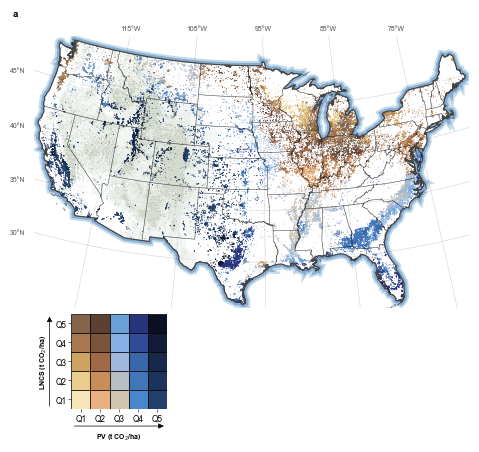

双变量地图生成完成！


In [471]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from pyproj import Transformer
from shapely.geometry import box, LineString
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from shapely.ops import unary_union
try:
    from shapely import make_valid
except Exception:
    make_valid = None
import matplotlib as mpl
import matplotlib.ticker as mticker
from shapely.validation import make_valid
from shapely.ops import transform as shp_transform

def plot_bivariate_nature_style(
    emission_data_merge, 
    us_nation_gdf,
    us_states_gdf, 
    dem_data, 
    var1_name='pv_potential_total(t)',
    var2_name='LNCS_expect',
    title1='Carbon Mitigation Potential',
    title2='Land Use Change Cost',
    unit1='MgC/ha',
    unit2='MgC/ha',
):
    """
    绘制双变量地图，Nature风格，3×3马赛克颜色条
    """
    # ==================== 1. 初始设置 ====================
    plt.rcParams.update({
        'font.size': 5, 'axes.titlesize': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5, 'legend.fontsize': 5,
        'font.family': 'Arial'
    })

    # 创建图形和坐标轴 - 保持figsize不变
    fig, ax = plt.subplots(1, 1, figsize=(130/25.4, 110/25.4))
    ax.set_autoscale_on(False)
    fig.patch.set_facecolor('white')      
    ax.set_facecolor('white')

    # ==================== 2. 地理边界设置 ====================
    usa_bounds_main = {'lon_min': -125, 'lon_max': -65, 'lat_min': 24, 'lat_max': 51}
    bbox = box(usa_bounds_main['lon_min'], usa_bounds_main['lat_min'],
               usa_bounds_main['lon_max'], usa_bounds_main['lat_max'])


    # 处理国界数据
    if isinstance(us_nation_gdf, gpd.GeoDataFrame):
        geom = us_nation_gdf.geometry.iloc[0]
    else:
        geom = us_nation_gdf

    geom = make_valid(geom)

    if geom.geom_type == "MultiPolygon":
        transformer_4326_to_alb = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True).transform
        areas = [shp_transform(transformer_4326_to_alb, p).area for p in geom.geoms]
        geom = list(geom.geoms)[int(np.argmax(areas))]

    # Wrap the (possibly Multi-)Polygon in a GeoSeries for CRS handling
    us_nation_geom_4326 = gpd.GeoSeries([geom], crs="EPSG:4326")
    us_nation_albers = us_nation_geom_4326.to_crs("ESRI:102003")
    
    # 处理州界线
    us_states_bound = us_states_gdf.to_crs(epsg=4326).clip(bbox)    
    us_states_albers = us_states_bound.to_crs('ESRI:102003')

    # 处理外框边界
    usa_bounds_main_box = box(
        usa_bounds_main['lon_min'] , usa_bounds_main['lat_min'] ,
        usa_bounds_main['lon_max'] , usa_bounds_main['lat_max'] 
    )
    usa_bounds_main_albers = gpd.GeoSeries([usa_bounds_main_box], crs="EPSG:4326").to_crs('ESRI:102003')

    xmin, ymin, xmax, ymax = us_nation_albers.total_bounds
    margin_left = 40000.0   # 单独设置左侧 (xmin) 的 margin
    margin_right = 40000.0  # 单独设置右侧 (xmax) 的 margin
    ax.set_xlim(xmin - margin_left, xmax + margin_right)
    ax.set_ylim(ymin - 40000.0, ymax + 40000.0)
    ax.set_position([0.07, 0.17, 0.85, 0.9])
    # ax.set_position([0.1, 0.1, 0.8, 0.8])


    


    # ==================== 3. 坐标变换设置 ====================
    transformer = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)



    # ==================== 5. 数据坐标转换 ====================
    x_proj, y_proj = transformer.transform(emission_data_merge['lon'].values, 
                                          emission_data_merge['lat'].values)

    # ==================== 6. 地形渲染 ====================
    qm = _render_terrain(ax, dem_data, usa_bounds_main, transformer)

    # ==================== 7. 地图元素绘制 ====================
    # 绘制国界线光晕效果
    _draw_glow_outline_outside(ax, us_nation_albers)
    
    # 绘制州界
    us_states_albers.plot(ax=ax, color='none', edgecolor='black', linewidth=0.4, alpha=0.4, zorder=9)

    ax.set_xticks([])
    ax.set_yticks([])

    # ==================== 8. 坐标轴设置 ====================
    
    for spine in ax.spines.values():
        spine.set_visible(False)

    lon_ticks = np.arange(-115, -65, 10)
    lat_ticks = [ 30,35,40,45]
    proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
    proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)
    _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv)

    # ==================== 9. 背景地图 ====================
    # _draw_background_map(ax, usa_bounds_main)


    # ==================== 10. 双变量数据可视化 ====================
    # 获取两个变量的数据
    var1_values = np.asarray(emission_data_merge[var1_name].values, dtype=float)
    var2_values = np.asarray(emission_data_merge[var2_name].values, dtype=float)
    
    # 移除NaN值
    valid_mask = ~(np.isnan(var1_values) | np.isnan(var2_values))
    var1_values = var1_values[valid_mask]
    var2_values = var2_values[valid_mask]
    x_proj_valid = x_proj[valid_mask]
    y_proj_valid = y_proj[valid_mask]
    

    # 创建3×3马赛克颜色方案
    palette = create_bivariate_colormap_5x5()
    
    # 为每个点分配马赛克类别
    var1_quintiles = np.percentile(var1_values, np.linspace(0, 100, 6))
    var2_quintiles = np.percentile(var2_values, np.linspace(0, 100, 6))

    var1_categories = np.digitize(var1_values, var1_quintiles[1:-1])  # 0–4
    var2_categories = np.digitize(var2_values, var2_quintiles[1:-1])  # 0–4
    
    # 创建颜色映射
    var1_bins = var1_quintiles[1:-1]  # length = 4
    var2_bins = var2_quintiles[1:-1]

    var1_cat = np.clip(np.digitize(var1_values, var1_bins), 0, 4)
    var2_cat = np.clip(np.digitize(var2_values, var2_bins), 0, 4)

    mosaic_idx = var1_cat * 5 + var2_cat   # 5 columns per row
    colors = [palette[idx] for idx in mosaic_idx]
    
    # 绘制散点
    scatter = ax.scatter(x_proj_valid, y_proj_valid, c=colors, s=0.35, alpha=0.95, 
                        edgecolors='none', zorder=5)

    # ==================== 11. 3×3马赛克颜色条 ====================
    _add_bivariate_colorbar_5x5(fig, ax, var1_quintiles, var2_quintiles,
                                title1, title2, unit1, unit2)

    # ==================== 12. 最终处理 ====================
    fig.canvas.draw()          
    if qm is not None:
        qm.set_clip_path(ax.patch)
        qm.set_rasterized(True)

    return fig, ax


import colorsys

def create_bivariate_colormap_5x5(style: str = "orange_blue_strong_smooth"):
    if style == "green_purple_strong":
        return [
            "#F1F5E6", "#E5E3EE", "#D8D0F2", "#C5B6E8", "#B28BD4",
            "#DCEEC9", "#CFE0D5", "#C3D2E0", "#B5C2E0", "#A2ACD8",
            "#C4E2A6", "#B4D3B5", "#A5C3C5", "#94B0C7", "#8297BF",
            "#AAC878", "#9CB883", "#8EA792", "#7C939A", "#697A94",
            "#8AA54C", "#7E945B", "#72836A", "#627177", "#505E73",
        ]
    if style == "teal_magenta":
        # 行：PV 由低→高；列：LNCS 由低→高（row-major）
        return [
            "#F5F6F7","#E6EFF2","#D5E7EC","#C2DEE5","#ADD4DE",
            "#F4EEF4","#E7E3F1","#D8D6ED","#C7C7E7","#B4B6DF",
            "#F7E4F5","#EBCDEB","#DEB4E0","#CF98D4","#BE7BC7",
            "#F9D7F4","#F0BDEB","#E49EE0","#D47BD2","#C556C2",
            "#FBCDF3","#F2B0EE","#E58FE6","#D46BDA","#C246CB",
        ]
    if style == "blue_orange_strong":
        return [
            "#F4F4F4","#E5EEF8","#D1E3F3","#B8D4EC","#9EC6E4",
            "#F9ECE3","#EEDFE8","#E0D1E6","#CDBFE0","#B7ABD7",
            "#FAD7C2","#F2C0D0","#E6A6CD","#D589C5","#C46BB8",
            "#FCB98E","#F59EAB","#EA81A1","#DB6293","#CA4785",
            "#FD9A57","#F67C7E","#EB5F6C","#DC445F","#CC2F54",
        ]
    if style == "orange_blue_strong_smooth":
        return [
            # Row 1: 褐色 → 土黄色（过渡暖调）
            "#F5E5B8", "#E9CD8D", "#CEA463", "#A87951", "#85644B",
            # Row 2: 深棕色 → 暗褐色
            "#E9B082", "#C98D57", "#A26946", "#7B543C", "#5E4032",
            # Row 3: 土黄 → 浅灰蓝
            "#D1C5AF", "#B7BFC5", "#9FB8DB", "#87B1E5", "#6A9FD7",
            # Row 4: 灰蓝 → 亮蓝
            "#4986CD", "#4176B9", "#3967A7", "#314B96", "#28357D",
            # Row 5: 蓝 → 深蓝
            "#23406C", "#1C345C", "#17294B", "#121C39", "#0B1024",
        ]

    if style == "brown_green":
        # 深棕色-绿色系，row-major（行：低褐→高绿；列：低褐→高绿）
        return [
            "#efe8e1", "#d1beb3", "#a87c5d", "#7a4e33", "#402714",
            "#e6ecd9", "#cecaa4", "#9a8a60", "#745830", "#3d2d12",
            "#d1e6be", "#b3c591", "#78914d", "#476821", "#233510",
            "#badf9b", "#90bb63", "#5f9131", "#326010", "#183208",
            "#a0d36f", "#6ea135", "#417a10", "#295a13", "#15340a",
        ]
    raise ValueError(f"Unknown style: {style}")





def _add_bivariate_colorbar_5x5(fig, ax, var1_quintiles, var2_quintiles,
                                title1, title2, unit1, unit2):
    from matplotlib.patches import FancyArrowPatch

    pos = ax.get_position()
    # 增大配色条的尺寸
    mosaic_left  = pos.x0 + 0.02 * pos.width
    mosaic_size  = 0.35 * pos.width           # 由0.3调大为0.5

    mosaic_bottom = pos.y0 - 0.37 * pos.height   
    mosaic_height = 0.35 * pos.height            

    mosaic_ax = fig.add_axes(
        [mosaic_left, mosaic_bottom, mosaic_size, mosaic_height],
        zorder=30
    )
    mosaic_ax.set_xlim(0, 5)
    mosaic_ax.set_ylim(0, 5)
    mosaic_ax.set_aspect('equal')

    palette = create_bivariate_colormap_5x5()
    for i in range(5):        # var1: LOW → HIGH (x axis)
        for j in range(5):    # var2: LOW → HIGH (y axis)
            color_idx = j + i * 5
            rect = plt.Rectangle((i, j), 1, 1, facecolor=palette[color_idx],
                                 edgecolor='black', linewidth=0.5)
            mosaic_ax.add_patch(rect)

    mosaic_ax.set_xticks(np.arange(0.5, 5.0, 1.0))
    mosaic_ax.set_yticks(np.arange(0.5, 5.0, 1.0))
    mosaic_ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], fontsize=6)
    mosaic_ax.set_yticklabels(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], fontsize=6)
    mosaic_ax.tick_params(axis='both', which='major',
                          pad=1.2, length=2, width=0.4, labelsize=6)

    arrow_x = FancyArrowPatch((0.0, -0.18), (1.0, -0.18),
                              transform=mosaic_ax.transAxes, clip_on=False,
                              arrowstyle='-|>', mutation_scale=8,
                              linewidth=0.5, color='black')
    mosaic_ax.add_artist(arrow_x)
    arrow_y = FancyArrowPatch((-0.23, 0.0), (-0.23, 1.0),
                              transform=mosaic_ax.transAxes, clip_on=False,
                              arrowstyle='-|>', mutation_scale=8,
                              linewidth=0.5, color='black')
    mosaic_ax.add_artist(arrow_y)

    mosaic_ax.text(0.5, -0.23, f'{title1} ({unit1})',
                   transform=mosaic_ax.transAxes, ha='center', va='top',
                   fontsize=5, fontweight='bold')
    mosaic_ax.text(-0.35, 0.5, f'{title2} ({unit2})',
                   transform=mosaic_ax.transAxes, ha='left', va='center',
                   fontsize=5, fontweight='bold', rotation=90)

    for spine in mosaic_ax.spines.values():
        spine.set_visible(False)

# ==================== 主程序 ====================
# 使用示例
try:
    # 转换：1 t C = 3.67 t CO2，先拷贝一份数据，避免覆盖原数据
    df_plot = df_analysis.copy()
    df_plot['pv_potential_dens_co2'] = df_plot['pv_potential_dens'] * 3.67
    df_plot['LNCS_expect_co2'] = df_plot['LNCS_expect'] * 3.67

    fig, ax = plot_bivariate_nature_style(
        df_plot, 
        us_nation_4326,
        us_states_4326, 
        dem_us,
        var1_name='pv_potential_dens_co2',
        var2_name='LNCS_expect_co2',
        title1='PV',
        title2='LNCS',
        unit1='t CO$_2$/ha',
        unit2='t CO$_2$/ha',
    )

    # 添加面板标签
    ax.text(-0.05, 1.1, 'a', transform=ax.transAxes,
            ha='left', va='top', fontsize=7, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, pad=0.2, lw=0), zorder=100)

    # 保存图片
    filename_png = "figure/US_figure/bivariate_emission_lucs_nature_style_300dpi.png"
    filename_pdf = "figure/US_figure/bivariate_emission_lucs_nature_style_300dpi.pdf"
    
    fig.savefig(filename_png, dpi=300, facecolor='White')  
    fig.canvas.draw()
    fig.savefig(filename_pdf, dpi=300, facecolor='None')                       

    plt.show()
    plt.close(fig)
    
    print("双变量地图生成完成！")

except Exception as e:
    print(f"生成双变量地图时出错: {e}")

# 2、Distribution of bi-vaiable

In [ ]:
df_analysis

,lat,lon,predicted_prob,gmm_density,sample_type,LNCS_expect,net_npv_usd,area_m2,E_yr_pixel,pv_potential_dens,power_generation_kwha,Expectation_net_benefit,ccd_optimized
0,25.295834,-80.287500,0.902568,2.806133e+19,prediction,811.854595,411724.028993,776295.361002,1.958127e+08,5568.344207,7.567199e+07,4756.489612,0.940305
1,25.437500,-80.537500,0.997976,5.399806e+21,prediction,1348.189022,287052.220262,775385.854124,1.913273e+08,5447.174926,7.402534e+07,4098.985904,0.828012
2,25.437500,-80.495834,0.995833,1.508036e+20,prediction,971.186274,278019.855286,775385.854124,1.910215e+08,5438.469092,7.390703e+07,4467.282818,0.882208
3,25.445833,-80.454170,0.990886,1.800785e+16,prediction,972.811005,272893.696918,775332.207938,1.908320e+08,5433.449375,7.383881e+07,4460.638370,0.880366
4,25.445833,-80.404170,0.996591,6.792866e+22,prediction,968.544647,294800.434504,775332.207938,1.915894e+08,5455.012162,7.413184e+07,4486.467516,0.888518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,48.995834,-99.995834,0.914557,5.692829e+14,prediction,377.830800,-556486.868714,563356.382622,1.180457e+08,4625.717362,6.286200e+07,4247.886562,0.790359
70333,48.995834,-99.987500,0.921603,1.413612e+14,prediction,307.516600,-562376.609379,563356.382622,1.178997e+08,4619.997412,6.278426e+07,4312.480812,0.800732
70334,48.995834,-99.895836,0.872176,3.161397e+13,prediction,324.674320,-598319.346882,563356.382622,1.170071e+08,4585.017928,6.230891e+07,4260.343608,0.757385
70335,48.995834,-99.887500,0.799749,6.767585e+13,prediction,323.374660,-594934.043507,563356.382622,1.170906e+08,4588.290785,6.235338e+07,4264.916125,0.691242


新的绘制方案：

创建两个图,subplot，总体的figsieze控制width 70mm, heitht 40mm 
左图：left spine 作为Y轴，表示数据密度；bottom spine 作为x轴，表示pv_potential_dens
使用fancy arrow 箭头 （箭头朝向右侧）

右图：right spine 作为Y轴，表示数据密；bottom spine 作为x轴，表示LNCS_expect，使用使用fancy arrow 箭头 （箭头朝向左侧）



In [13]:
def plot_weighted_density_subplots(df_analysis,
                                   pv_col='pv_potential_dens',
                                   lncs_col='LNCS_expect',
                                   figsize_mm=(70, 40),
                                   save_path=None):
    from scipy.stats import gaussian_kde
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patches import FancyArrowPatch

    # -------------- 1. 数据准备（不做面积加权） --------------
    sel = df_analysis[[pv_col, lncs_col]].dropna()
    if sel.empty:
        raise ValueError("输入数据为空或存在 NaN。")

    # 原本的C Mg/ha，转化为二氧化碳（1 t C = 3.67 t CO2）
    pv_vals   = sel[pv_col].to_numpy() * 3.67
    lncs_vals = sel[lncs_col].to_numpy() * 3.67
    weights = df_analysis['area_m2'].to_numpy() / 10000.0  # ha
    values = df_analysis[pv_col].to_numpy()

    # choose bins along PV
    bins = np.linspace(values.min(), values.max(), 40)

    area_per_bin, _ = np.histogram(values, bins=bins, weights=weights)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # KDE
    kde_pv   = gaussian_kde(pv_vals, weights=None)
    kde_lncs = gaussian_kde(lncs_vals, weights=None)

    # 1%–99% 裁剪并作为坐标范围
    pv_lo, pv_hi     = np.percentile(pv_vals,   [1, 99])
    lncs_lo, lncs_hi = np.percentile(lncs_vals, [1, 99])

    x_pv    = np.linspace(pv_lo,   pv_hi,   400)
    x_lncs  = np.linspace(lncs_lo, lncs_hi, 400)
    y_pv    = kde_pv(x_pv)
    y_lncs  = kde_lncs(x_lncs)

    y_pv_max = y_pv.max()
    y_lncs_max = y_lncs.max()



    width_in, height_in = figsize_mm[0]/25.4, figsize_mm[1]/25.4

    # 如果想要严格对齐，需要 sharey=True
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(width_in, height_in))
    plt.rcParams.update({
        'font.size': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5,
        'legend.fontsize': 5, 'font.family': 'Arial'
    })
    fig.subplots_adjust(left=0.12, right=0.98, top=0.88, bottom=0.25, wspace=0.25)

    # Left: PV density
    ax_left.plot(x_pv, y_pv, color="#1565C0", lw=1.0)
    ax_left.fill_between(x_pv, 0, y_pv, color="#B3E5FC", alpha=0.35)
    ax_left.set_xlim(pv_lo, pv_hi*1.05)
    ax_left.set_ylim(0, y_pv_max * 1.05)
    ax_left.set_xlabel("PV potential t CO$_2$/ha")
    ax_left.set_ylabel("Density", color="#1565C0")
    ax_left.tick_params(axis='y', colors="#1565C0")
    ax_left.spines['top'].set_visible(False)
    ax_left.spines['right'].set_visible(False)

    # x轴箭头向右
    # 继续向右平移箭头位置
    # 统一箭头长度和比例
    arrow_length_frac = 0.06  # 两个箭头长度相同（均为坐标轴长度的6%）
    pv_arrow_start = pv_hi + (pv_hi - pv_lo) * 0.11
    pv_arrow_end   = pv_arrow_start + (pv_hi - pv_lo) * arrow_length_frac
    arrow_pv_x = FancyArrowPatch(
        (pv_arrow_start, 0), 
        (pv_arrow_end, 0),
        transform=ax_left.get_xaxis_transform(),
        clip_on=False, arrowstyle='simple', color="black", mutation_scale=8)
    ax_left.add_patch(arrow_pv_x)

    # y轴箭头向上
    arrow_pv_y = FancyArrowPatch(
        (0.0, 1.0), (0.0, 1.08),        # y-axis coordinates, no data units
        transform=ax_left.transAxes,    # axes-fraction coordinates
        clip_on=False,
        arrowstyle='simple',
        color="black",
        mutation_scale=8
    )
    ax_left.add_patch(arrow_pv_y)

    # Right: LNCS density
    ax_right.plot(x_lncs, y_lncs, color="#E65100", lw=1.0)
    ax_right.fill_between(x_lncs, 0, y_lncs, color="#FFE0B2", alpha=0.35)
    ax_right.set_xlim(lncs_hi*1.05, lncs_lo)  # 倒序显示
    ax_right.set_ylim(0, y_lncs_max * 1.05)
    ax_right.set_xlabel("LNCS expectation t CO$_2$/ha")
    ax_right.tick_params(axis='y', colors="#E65100")
    ax_right.set_ylabel("Density", color="#E65100")
    ax_right.yaxis.tick_right()
    ax_right.yaxis.set_label_position("right")
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    lncs_arrow_length = (lncs_hi - lncs_lo) * arrow_length_frac
    lncs_offset = (lncs_hi - lncs_lo) * -0.1  # 与左一致，右向外偏移
    lncs_arrow_start = lncs_hi - lncs_arrow_length - lncs_offset
    lncs_arrow_end   = lncs_hi - lncs_offset
    arrow_lncs_x = FancyArrowPatch(
        (lncs_arrow_start, 0), (lncs_arrow_end, 0),
        transform=ax_right.get_xaxis_transform(),
        clip_on=False,
        arrowstyle='simple',
        color="black",
        mutation_scale=8
    )
    ax_right.add_patch(arrow_lncs_x)

    arrow_lncs_y = FancyArrowPatch(
        (1.0, 1.0), (1.0, 1.08),        # x = 1 sits on the right spine
        transform=ax_right.transAxes,
        clip_on=False,
        arrowstyle='simple',
        color="black",
        mutation_scale=8
    )
    ax_right.add_patch(arrow_lncs_y)

    fig.patch.set_facecolor('white')
    if save_path:
        fig.savefig(save_path, dpi=300, facecolor='white')
        print(f"✅ 分布子图已保存: {save_path}")
    return fig, (ax_left, ax_right)



✅ 分布子图已保存: figure/US_figure/weighted_density_subplots.png


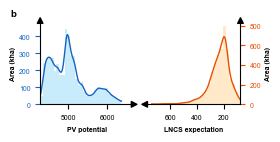

In [20]:
fig, (ax_l, ax_r) = plot_weighted_density_subplots(df_analysis,
    save_path="figure/US_figure/weighted_density_subplots.png")

## Version 2 

In [35]:
def plot_weighted_density_subplots(df_analysis,
                                   pv_col='pv_potential_dens',
                                   lncs_col='LNCS_expect',
                                   area_col='area_m2',
                                   figsize_mm=(70, 33),
                                   bins_count=30,
                                   save_path=None):
    """
    双子图：左图为 PV 潜力的面积分布，右图为 LNCS 的面积分布。
    每个子图展示：
      1. 面积加权直方图（单位 ha）
      2. KDE 拟合曲线，按面积权重缩放到同一尺度 (ha)
    """

    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.patches import FancyArrowPatch
    from scipy.stats import gaussian_kde

    # ---- 1. 数据准备 ----
    sel = df_analysis[[pv_col, lncs_col, area_col]].dropna()
    if sel.empty:
        raise ValueError("输入数据为空或存在 NaN。")

    area_ha = sel[area_col].to_numpy() / 10000.0  # m² → ha
    pv_vals   = sel[pv_col].to_numpy() * 3.67
    lncs_vals = sel[lncs_col].to_numpy() * 3.67

    # 1%–99% 范围，处理离群值
    pv_lo, pv_hi = np.percentile(pv_vals, [1, 99])
    lncs_lo, lncs_hi = np.percentile(lncs_vals, [1, 99])

    def area_hist_and_kde(values, weights, lo, hi, n_bins):
        bins = np.linspace(lo, hi, n_bins + 1)
        totals, _ = np.histogram(values, bins=bins, weights=weights)
        centers = 0.5 * (bins[1:] + bins[:-1])

        # KDE (权重=面积)
        kde = gaussian_kde(values, weights=weights)
        x = np.linspace(lo, hi, 400)
        band = bins[1] - bins[0]  # 等宽 bins
        y = kde(x) * weights.sum() * band  # 密度转化为面积
        return centers, totals, bins, x, y

    pv_centers, pv_totals, pv_bins, pv_x, pv_kde = area_hist_and_kde(
        pv_vals, area_ha, pv_lo, pv_hi, bins_count)
    lncs_centers, lncs_totals, lncs_bins, lncs_x, lncs_kde = area_hist_and_kde(
        lncs_vals, area_ha, lncs_lo, lncs_hi, bins_count)

    # Y轴全部除以1000（kha单位）
    pv_totals_kha = pv_totals / 1000.0
    pv_kde_kha = pv_kde / 1000.0
    lncs_totals_kha = lncs_totals / 1000.0
    lncs_kde_kha = lncs_kde / 1000.0

    # ---- 2. 画布设置 ----
    width_in, height_in = figsize_mm[0] / 25.4, figsize_mm[1] / 25.4
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(width_in, height_in))
    plt.rcParams.update({
        'font.size': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5,
        'legend.fontsize': 5, 'font.family': 'Arial'
    })
    fig.subplots_adjust(left=0.12, right=0.98, top=0.88, bottom=0.25, wspace=0.12)

    # ---- 3. 左图：PV ----
    bar_width = np.diff(pv_bins)
    ax_left.bar(pv_centers, pv_totals_kha, width=bar_width, align='center',
                color="#B3E5FC", edgecolor='none', alpha=0.7)
    ax_left.plot(pv_x, pv_kde_kha, color="#1565C0", lw=1.0)
    ax_left.set_xlim(pv_lo, pv_hi*1.05)
    ax_left.set_ylim(0, max(pv_totals_kha.max(), pv_kde_kha.max()) * 1.1)
    ax_left.set_xlabel("PV ability (t CO$_2$/ha)", fontweight='bold')
    ax_left.set_ylabel("Area (kha)", color="black", labelpad=2, fontweight='bold')
    ax_left.tick_params(axis='y', colors="#1565C0")
    ax_left.spines['top'].set_visible(False)
    ax_left.spines['right'].set_visible(False)

    # x箭头（右）
    arrow_len = (pv_hi - pv_lo) * 0.06
    arrow_offset = (pv_hi - pv_lo) * 0.13
    arrow_pv_x = FancyArrowPatch(
        (pv_hi + arrow_offset, 0),
        (pv_hi + arrow_offset + arrow_len, 0),
        transform=ax_left.get_xaxis_transform(),
        clip_on=False, arrowstyle='simple', color='black', mutation_scale=8)
    ax_left.add_patch(arrow_pv_x)
    # y箭头（上）
    arrow_pv_y = FancyArrowPatch(
        (0.0, 1.0), (0.0, 1.08),
        transform=ax_left.transAxes,
        clip_on=False, arrowstyle='simple', color='black', mutation_scale=8)
    ax_left.add_patch(arrow_pv_y)




    # ---- 4. 右图：LNCS ----
    bar_width_lncs = np.diff(lncs_bins)
    ax_right.bar(lncs_centers, lncs_totals_kha, width=bar_width_lncs, align='center',
                 color="#FFE0B2", edgecolor='none', alpha=0.7)
    ax_right.plot(lncs_x, lncs_kde_kha, color="#E65100", lw=1.0)
    ax_right.set_xlim(lncs_hi*1.05, lncs_lo)  # 倒序
    ax_right.set_ylim(0, max(lncs_totals_kha.max(), lncs_kde_kha.max()) * 1.05)
    ax_right.set_xlabel("LNCS ability (t CO$_2$/ha)", fontsize=5, fontweight='bold')
    ax_right.tick_params(axis='y', colors="#E65100")
    ax_right.set_ylabel("Area (kha)", color="black", labelpad=2, fontweight='bold')
    ax_right.yaxis.tick_right()
    ax_right.yaxis.set_label_position("right")
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    lncs_arrow_len = (lncs_hi - lncs_lo) * 0.06
    lncs_offset = (lncs_hi - lncs_lo) * (-0.05)

    arrow_lncs_x = FancyArrowPatch(
        (lncs_hi - lncs_offset, 0),
        (lncs_hi - lncs_offset + lncs_arrow_len, 0),
        transform=ax_right.get_xaxis_transform(),
        clip_on=False, arrowstyle='simple', color='black', mutation_scale=8)
    ax_right.add_patch(arrow_lncs_x)
    arrow_lncs_y = FancyArrowPatch(
        (1.0, 1.0), (1.0, 1.08),
        transform=ax_right.transAxes,
        clip_on=False, arrowstyle='simple', color='black', mutation_scale=8)
    ax_right.add_patch(arrow_lncs_y)

    fig.text(-0.32, 1.15, 'b', transform=ax_left.transAxes,
    ha='left', va='top', fontsize=7, fontweight='bold',
    bbox=dict(facecolor='white', alpha=0.7, pad=0.2, lw=0), zorder=100)

    fig.patch.set_facecolor('white')

    if save_path:
        fig.tight_layout()
        fig.savefig(save_path, dpi=300, facecolor='white')
        print(f"✅ 分布子图已保存: {save_path}")
    return fig, (ax_left, ax_right)

✅ 分布子图已保存: figure/US_figure/weighted_density_subplots_area.png


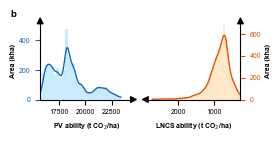

In [36]:
fig, (ax_l, ax_r) = plot_weighted_density_subplots(
    df_analysis,
    bins_count=35,
    save_path="figure/US_figure/weighted_density_subplots_area.png"
)

# 3、Probability map & cloud map 

## 3.1 Probability density

In [518]:
df_weight = pd.read_csv('data/US_data/df_weight.csv')
df_analysis=pd.read_csv(r'data\US_data\df_merged_data_for_analysis.csv')


In [519]:
variable_weight=['weighted_density_Agricultural','weighted_density_Forest','weighted_density_Vegetation']
variable_lncs = ['final_forest', 'final_agro', 'final_veg']
lncs_data = df_weight[['lat', 'lon'] + variable_lncs + variable_weight]
df_analysis = df_analysis.merge(lncs_data, on=['lat', 'lon'], how='left')
df_analysis

,lat,lon,predicted_prob,gmm_density,sample_type,LNCS_expect,net_npv_usd,area_m2,E_yr_pixel,pv_potential_dens,power_generation_kwha,Expectation_net_benefit,ccd_optimized,final_forest,final_agro,final_veg,weighted_density_Agricultural,weighted_density_Forest,weighted_density_Vegetation
0,25.295834,-80.287500,0.902568,2.806133e+19,prediction,811.854595,411724.028993,776295.361002,1.958127e+08,5568.344207,7.567199e+07,4756.489612,0.940305,811.84186,764.000000,844.84770,0.000367,0.998714,0.000918
1,25.437500,-80.537500,0.997976,5.399806e+21,prediction,1348.189022,287052.220262,775385.854124,1.913273e+08,5447.174926,7.402534e+07,4098.985904,0.828012,1391.45790,1102.152466,1138.81860,0.007830,0.829869,0.162302
2,25.437500,-80.495834,0.995833,1.508036e+20,prediction,971.186274,278019.855286,775385.854124,1.910215e+08,5438.469092,7.390703e+07,4467.282818,0.882208,1028.14750,750.145691,782.05790,0.022229,0.771417,0.206354
3,25.445833,-80.454170,0.990886,1.800785e+16,prediction,972.811005,272893.696918,775332.207938,1.908320e+08,5433.449375,7.383881e+07,4460.638370,0.880366,1028.14750,756.315613,787.59076,0.007369,0.770923,0.221708
4,25.445833,-80.404170,0.996591,6.792866e+22,prediction,968.544647,294800.434504,775332.207938,1.915894e+08,5455.012162,7.413184e+07,4486.467516,0.888518,1053.12240,728.004333,772.76874,0.099801,0.714253,0.185946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,48.995834,-99.995834,0.914557,5.692829e+14,prediction,377.830800,-556486.868714,563356.382622,1.180457e+08,4625.717362,6.286200e+07,4247.886562,0.790359,377.83080,324.812927,357.41420,0.000000,1.000000,0.000000
70333,48.995834,-99.987500,0.921603,1.413612e+14,prediction,307.516600,-562376.609379,563356.382622,1.178997e+08,4619.997412,6.278426e+07,4312.480812,0.800732,307.51660,262.768982,266.84415,0.000000,1.000000,0.000000
70334,48.995834,-99.895836,0.872176,3.161397e+13,prediction,324.674320,-598319.346882,563356.382622,1.170071e+08,4585.017928,6.230891e+07,4260.343608,0.757385,324.67432,273.972321,343.00000,0.000000,1.000000,0.000000
70335,48.995834,-99.887500,0.799749,6.767585e+13,prediction,323.374660,-594934.043507,563356.382622,1.170906e+08,4588.290785,6.235338e+07,4264.916125,0.691242,323.37466,273.972321,338.53870,0.000000,1.000000,0.000000


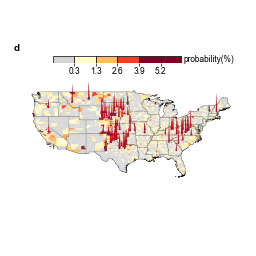

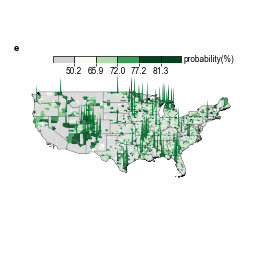

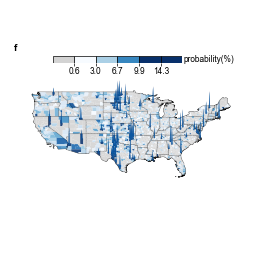

3D密度图生成完成！


In [524]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math

def plot_3d_density(
    df_weight, 
    us_counties_4326, 
    us_states_4326, 
    var_names=('weighted_density_Forest','weighted_density_Agricultural','weighted_density_Vegetation'),
    var_threshold_pcts=(5,5,5),
    *, 
    spike_mode='line'        # 'line' | 'cone' | 'pyramid'
):
    """
    目标：
    - def _stretch_xy 函数控制的是图像伸缩程度（需要大量实验测试，不同的底图有不同伸缩方式来适应）
    - def _fullwidth_axe函数控制的是数据框大小（相当于地图外侧有个数据框，它与画布的设置figsize是有所不同的）
    - 主要控制视觉效果的是CFG中的elev，azim；
    - 峰值尽量简单（我这里给出了三种）
    """

    CFG = dict(
        fig_size=(60/25.4, 40/25.4),
        elev=70, azim=-90,        # ≈30°俯视、另外一个控制朝向，一般来说从南看北是这个角度。
        bg="white",               # 背景色设置为白色
        border_frac=0.02,         # 地图四周小留白
        z_exag=0.78,               # 控制峰值的大小
        peak_floor=0.25,
        max_spikes=200,
        line_width=1.0,
        cmaps=(plt.cm.YlOrRd, plt.cm.Greens, plt.cm.Blues),
        colorbar_percentiles=[90, 80, 70, 60, 50],  # 5段colorbar
        colorbar_labels=['90%', '80%', '70%', '60%', '50%'],
    )

    plt.rcParams.update({
        'font.size': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5,
        'legend.fontsize': 5, 'font.family': 'Arial'
    })

    # ——— 数据准备（4326，裁剪大陆48州） ———
    bbox = box(-125, 24, -65, 51)
    counties = us_counties_4326.to_crs(4326).clip(bbox)
    states   = us_states_4326.to_crs(4326).clip(bbox)

    xmin0, ymin0, xmax0, ymax0 = counties.total_bounds
    bx = (xmax0 - xmin0) * CFG["border_frac"]
    by = (ymax0 - ymin0) * CFG["border_frac"]
    xmin, xmax = xmin0 - bx, xmax0 + bx
    ymin, ymax = ymin0 - by, ymax0 + by
    xmid, ymid = 0.5*(xmin+xmax), 0.5*(ymin+ymax)
    xspan, yspan = (xmax-xmin), (ymax-ymin)

    gdf_weight = gpd.GeoDataFrame(
        df_weight.copy(),
        geometry=gpd.points_from_xy(df_weight["lon"], df_weight["lat"]),
        crs=4326
    )
    joined = gpd.sjoin(
        gdf_weight[["geometry"] + list(var_names)],
        counties[["geometry","NAME"]],
        predicate="within", how="inner"
    )
    stats = joined.groupby("NAME").agg({vn:"mean" for vn in var_names}).reset_index()
    counties_plot = counties.merge(stats, on="NAME", how="left").fillna(0.0)

    figs = []

    # —— 关键：自动把 3D pane 变成“以宽度为限的正方形”，并贴到底边 —— 
    def _fullwidth_axes(fig, ax):
        fw, fh = fig.get_size_inches()         # 例如 60mm×35mm
        need_h_norm = (fw / fh)                # 让轴域的归一化高度 >= 宽度（1.0）* (fw/fh)
        h = need_h_norm * 1.02              # 略加 2% 缓冲
        bottom = 1.2 - h                       # 顶边对齐到 1.0，把轴域整体“向下拉出画布”
        ax.set_position([0.0, bottom, 1.0, h]) # → pane 会以“宽度”为限制，横向吃满 60mm

    def _stretch_xy(fig, y_scale=1.0):
        # x和y都可拉伸，y_scale控制y方向拉伸倍数（默认1.0为不变）
        fw, fh = fig.get_size_inches()
        target_aspect = fw / fh
        data_aspect   = (xspan / yspan) if yspan > 0 else 1.0
        sx = target_aspect / data_aspect
        sy = y_scale * 1.25
        def sx_fun(xx): return xmid + sx*(xx - xmid)
        def sy_fun(yy): return ymid + sy*(yy - ymid)
        return sx_fun, sy_fun, sx, sy

    # ——— 可选的体块峰（若需要） ———
    def _add_line(ax, cx, cy, H, color, lw):
        ax.plot([cx,cx],[cy,cy],[0,H], color=color, lw=lw, alpha=0.95, zorder=20)

    def _add_cone(ax, cx, cy, H, color):
        # 极简圆锥：两圈就够（轻量）
        th = np.linspace(0, 2*np.pi, 24, endpoint=False)
        r0, r1 = 0.12, 0.0
        x0, y0 = cx + r0*np.cos(th), cy + r0*np.sin(th)
        x1, y1 = cx + r1*np.cos(th), cy + r1*np.sin(th)
        faces=[]
        for j in range(len(th)):
            j2=(j+1)%len(th)
            faces.append([(x0[j],y0[j],0.0),(x0[j2],y0[j2],0.0),(x1[j2],y1[j2],H)])
            faces.append([(x0[j],y0[j],0.0),(x1[j2],y1[j2],H), (x1[j],y1[j],H)])
        ax.add_collection3d(Poly3DCollection(faces, facecolor=(*color[:3],0.96), edgecolor=None, linewidths=0.1))

    def _add_pyramid(ax, cx, cy, H, color):
        d = 0.1
        base = np.array([[cx-d,cy,0],[cx,cy+d,0],[cx+d,cy,0],[cx,cy-d,0]])
        apex = np.array([cx,cy,H])
        faces=[[base[0],base[1],apex],[base[1],base[2],apex],[base[2],base[3],apex],[base[3],base[0],apex]]
        ax.add_collection3d(Poly3DCollection(faces, facecolor=(*color[:3],0.96), edgecolor=None, linewidths=0.12))
    
    def _add_colorbar(fig, ax, colorbar_thresholds, cmap, variable_name, peak_threshold):
        """添加左下角5段colorbar，在颜色交界处显示原始数值"""
        left, bottom, width, height = 0.18, 0.85, 0.55, 0.04
        cax = fig.add_axes([left, bottom, width, height], zorder=100)
        cax.set_in_layout(False)
        cax.set_zorder(50)

        # 6段颜色：灰色(0-50%) + 4段渐变(50%-90%) + 峰值色(90%+)
        colors = ['lightgray']
        for i in range(4):
            norm = i / 3
            colors.append(cmap(norm))
        colors.append(cmap(1.0))

        # 绘制colorbar - 修正对齐问题
        segment_width = 1.0 / 6
        for i in range(6):
            x_start = i * segment_width
            x_end = (i + 1) * segment_width
            cax.barh(0.5, x_end - x_start, left=x_start, height=1,
                    color=colors[i], edgecolor='black', linewidth=0.5)

        # 设置范围
        cax.set_xlim(0, 1)
        cax.set_ylim(0, 1)
        cax.set_yticks([])
        for spine in cax.spines.values():
            spine.set_visible(False)
        
        # 在颜色交界处显示原始数值 - 5个交界处对应5个数值
        tick_positions = [i * segment_width for i in range(1, 6)]  # 5个交界处位置
        tick_values = colorbar_thresholds  # 5个阈值
        tick_labels = [f'{v*100:.1f}' for v in tick_values]  # 乘以100，保留2位小数
        
        cax.set_xticks(tick_positions)
        cax.set_xticklabels(tick_labels, fontsize=6)
        
        # 缩小tick大小
        cax.tick_params(axis='x', which='major', length=2, width=0.5, pad=1, labelsize=6)
        cax.tick_params(axis='x', which='minor', length=1, width=0.3, label1On=False)
        
        # 添加标题
        # cax.text(0.5, 1.3, f"{variable_name}", ha='center', va='bottom', 
        #         fontsize=6, fontweight='bold', transform=cax.transAxes)
        # 在坐标轴右侧添加 'probability(%)'
        cax.text(1.01, 0.5, 'probability(%)', ha='left', va='center', fontsize=6, transform=cax.transAxes)

        return cax
    

    for i,(vn,pctl) in enumerate(zip(var_names, var_threshold_pcts)):
        cmap = CFG["cmaps"][i] if i < len(CFG["cmaps"]) else plt.cm.viridis

        fig = plt.figure(figsize=CFG["fig_size"])
        ax  = fig.add_subplot(111, projection="3d")
        ax.set_axis_off()
        fig.patch.set_facecolor("white")
        ax.set_facecolor(CFG["bg"])

        # —— 横向拉伸（x 变宽，y 不变）——
        sx_fun, sy_fun, sx, sy = _stretch_xy(fig)
        xmin_s, xmax_s = sx_fun(xmin), sx_fun(xmax)
        ymin_s, ymax_s = sy_fun(ymin), sy_fun(ymax)
        xspan_s, yspan_s = (xmax_s-xmin_s), (ymax_s-ymin_s)
        z_target = CFG["z_exag"] * max(xspan_s, yspan_s)

        # —— 先设置范围 —— 
        ax.set_xlim(xmin_s, xmax_s)
        ax.set_ylim(ymin_s, ymax_s)
        ax.set_zlim(0, z_target)

        try: ax.set_proj_type('ortho')
        except Exception: pass
        ax.view_init(elev=CFG["elev"], azim=CFG["azim"])

        # —— 把 pane 做“又宽又扁”，但关键靠下面的 _fullwidth_axes —— 
        try: ax.set_box_aspect([xspan_s*1.8, yspan_s, z_target*0.6])
        except Exception: pass

        # —— 彻底让 pane 以“宽度”为限制，并贴到底边 —— 
        _fullwidth_axes(fig, ax)   
        for f in (ax.set_zmargin, ax.set_xmargin, ax.set_ymargin):
            try: f(0.0)
            except Exception: pass

        # 州界（Z=0）
        for geom in states.geometry:
            if geom.is_empty: continue
            geoms = [geom] if geom.geom_type=="Polygon" else list(geom.geoms)
            for g in geoms:
                x,y = g.exterior.xy
                ax.plot(sx_fun(np.asarray(x)), sy_fun(np.asarray(y)), np.zeros_like(x), 
                        color="black", lw=0.5, alpha=0.7)

        ## 方便你自己检查数据框的位置，把握
        # ax.plot([xmin_s, xmax_s, xmax_s, xmin_s, xmin_s], 
        #         [ymin_s, ymin_s, ymax_s, ymax_s, ymin_s], 
        #         [0, 0, 0, 0, 0], 
        #         color="black", lw=0.5, alpha=0.8, zorder=10)
                        

        # 底图
        vals_all = counties_plot[vn].to_numpy(float)
        pos_all  = vals_all[vals_all > 0]
        thr  = np.percentile(pos_all, 100-pctl) if pos_all.size else 0.0


        colorbar_thresholds = [np.percentile(pos_all, 100-p) if pos_all.size else 0.0 for p in CFG["colorbar_percentiles"]]



        for _, row in counties_plot.iterrows():
            geom = row.geometry
            v    = float(row[vn])
            
            # 确定颜色 - 使用渐变而不是单色
            if v <= 0:
                color = 'lightgray'  # 0值显示为灰色
            elif v < colorbar_thresholds[-1]:  # 小于50%阈值
                color = 'lightgray'  # 0-50%显示为灰色
            elif v >= thr:  # 超过峰值阈值（前var_threshold_pcts%）
                color = cmap(1.0)  # 前var_threshold_pcts%保持最亮颜色
            else:
                # 在50%-var_threshold_pcts%之间，使用连续渐变
                # 将v映射到50%-90%的范围内
                v_min = colorbar_thresholds[-1]  # 50%阈值
                v_max = thr  # 峰值阈值
                if v_max > v_min:
                    norm = (v - v_min) / (v_max - v_min)
                    color = cmap(norm)
                else:
                    color = cmap(0.5)
            
            patches = [geom] if geom.geom_type=="Polygon" else list(geom.geoms)
            for poly in patches:
                x,y = poly.exterior.xy
                xs,ys = sx_fun(np.asarray(x)), sy_fun(np.asarray(y))
                ax.add_collection3d(Poly3DCollection([list(zip(xs,ys,np.zeros_like(xs)))],
                                                    facecolor=color, edgecolor='none', alpha=0.88))

        # 峰（默认线段，最简单）
        needles = counties_plot[counties_plot[vn] > thr].copy()
        needles = needles.sort_values(vn, ascending=False).head(CFG["max_spikes"])
        Hmin = CFG["peak_floor"] * z_target
        vmax = max(thr, needles[vn].max()) if not needles.empty else thr
        for _, row in needles.iterrows():
            v = float(row[vn]); s = 0 if vmax<=0 else (v - thr) / (vmax - thr + 1e-9)
            H = Hmin + (z_target - Hmin) * (s ** 0.7)
            c  = row.geometry.centroid
            cx, cy = sx_fun(c.x), sy_fun(c.y)
            col = cmap(0.85)
            if spike_mode == 'line':
                ax.plot([cx,cx],[cy,cy],[0,H], color=col, lw=CFG["line_width"], alpha=0.95, zorder=20)
            elif spike_mode == 'cone':
                _add_cone(ax, cx, cy, H, col)
            elif spike_mode == 'pyramid':
                _add_pyramid(ax, cx, cy, H, col)

        # 面板字母
        fig.text(0.015, 0.97, chr(ord('d')+i), ha='left', va='top',
                 fontsize=7, fontweight='bold',
                 bbox=dict(facecolor='white', alpha=0.85, pad=0.25, lw=0))

        cax_colorbar=_add_colorbar(fig, ax, colorbar_thresholds, cmap, titles[i], thr)

        

        figs.append(fig)

    return figs



# ==================== 主程序 ====================
# 使用示例
try:
    titles = ['Agricultural crop','Forest' ,'Non-woody vegetation',]
    figs = plot_3d_density(
    df_analysis, us_counties_4326, us_states_4326,
    var_names=['weighted_density_Agricultural','weighted_density_Forest','weighted_density_Vegetation'],
    var_threshold_pcts=[3,3,3],
    spike_mode='cone'  # 或 'cone' / 'pyramid'
    )
    
    for i, fig in enumerate(figs):
        filename_png = f"figure/US_figure/3d_density_{titles[i].lower()}_300dpi.png"
        filename_pdf = f"figure/US_figure/3d_density_{titles[i].lower()}_300dpi.pdf"
        
        fig.savefig(filename_png, dpi=300, facecolor='White')  
        fig.canvas.draw()
        fig.savefig(filename_pdf, dpi=300, facecolor='None')                       

        plt.show()
        plt.close(fig)
    
    print("3D密度图生成完成！")

except Exception as e:
    print(f"生成3D密度图时出错: {e}")

## 3.2 Cloud map

In [521]:


def integrated_cloudrain_carbon_analysis_single(emission_data_merge, us_counties_4326):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import geopandas as gpd
    from scipy.stats import gaussian_kde
    import ptitprince as pt
    from matplotlib.collections import PolyCollection
    from matplotlib.patches import FancyArrowPatch

    plt.rcParams.update({
        'font.size': 5, 'axes.labelsize': 5,
        'xtick.labelsize': 5, 'ytick.labelsize': 5,
        'legend.fontsize': 5, 'font.family': 'Arial'
    })

    required = ["lat", "lon", "final_agro", "final_forest", "final_veg"]
    missing = [c for c in required if c not in emission_data_merge.columns]
    if missing:
        raise ValueError(f"缺少必要的列: {missing}")

    base = emission_data_merge[required].copy()
    clip_cols = ["final_agro", "final_forest", "final_veg"]

    for col in clip_cols:
        upper = base[col].quantile(0.99)
        base[col] = base[col].clip(upper=upper)

    gdf = gpd.GeoDataFrame(
        base,
        geometry=gpd.points_from_xy(base["lon"], base["lat"]),
        crs="EPSG:4326",
    )
    counties = us_counties_4326.to_crs(4326)
    joined = gpd.sjoin(
        gdf, counties[["geometry", "NAME"]],
        predicate="within", how="inner"
    )

    aggregated = (
        joined.groupby("NAME")[["final_agro", "final_forest", "final_veg"]]
        .mean()
        .reset_index()
    )
    if aggregated.empty:
        raise ValueError("聚合结果为空，请检查输入数据。")

    order = ["final_agro", "final_forest", "final_veg"]
    palette = {
        "final_agro": "#F43D25",
        "final_forest": "#2E8B57",
        "final_veg": "#4682B4",
    }
    labels = {
        "final_agro": "Agricultural",
        "final_forest": "Forest",
        "final_veg": "Vegetation",
    }

    width_in, height_in = 60 / 25.4, 25 / 25.4
    figures = {}

    for var in order:
        vals = aggregated[var].dropna().to_numpy()
        if vals.size < 2:
            continue

        cmin, cmax = vals.min(), vals.max()
        x_lower = cmin
        x_upper = max(cmax, cmin + 1e-6)

        fig, ax = plt.subplots(figsize=(width_in, height_in))
        df_plot = pd.DataFrame({"value": vals, "label": [labels[var]] * len(vals)})

        # --- 分层参数 ---
        center = 0.4          # 抖动点的基准位置
        violin_offset = -0.65  # 半提琴向上偏移
        box_offset = 0.25  # 箱线向下偏移
        jitter_scale = 0.04   # 抖点散布范围

        existing = [c for c in ax.collections if isinstance(c, PolyCollection)]
        pt.half_violinplot(
            data=df_plot,
            x="value",
            y="label",
            palette={labels[var]: palette[var]},
            bw=.2,
            cut=0,
            scale="area",
            width=0.55,
            orient="h",
            offset=center + violin_offset,
            inner=None,
            ax=ax,
            zorder=1,
        )
        for coll in ax.collections:
            if isinstance(coll, PolyCollection) and coll not in existing:
                coll.set_facecolor(palette[var])
                coll.set_edgecolor("black")
                coll.set_alpha(0.75)

        jitter_y = np.random.normal(loc=center, scale=jitter_scale, size=len(vals))
        ax.scatter(
            df_plot["value"], jitter_y,
            s=5, color=palette[var],
            edgecolors="white", linewidth=0.2, alpha=0.9, zorder=3,
        )

        ax.boxplot(
            vals,
            positions=[center + box_offset],
            vert=False,
            widths=0.15,
            patch_artist=True,
            showfliers=False,
            whis=(5, 95),
            boxprops=dict(facecolor=palette[var], alpha=0.75, linewidth=0.8),
            medianprops=dict(color="black", linewidth=1.0),
            whiskerprops=dict(color="black", linewidth=0.8),
            capprops=dict(color="black", linewidth=0.8),
            zorder=4,
        )

        ax.set_xlim(0, x_upper * 1.05)
        ax.set_ylim(center - 0.5, center + 0.35)
        ax.set_yticks([center + 0.1])
        # ax.set_yticklabels([labels[var]], fontweight="bold", rotation=90)
        # ax.tick_params(axis="y", pad=10)
        ax.set_yticklabels([])
        ax.set_ylabel("")
        ax.set_xlabel("Mitigation ability (t/ha)", fontweight="bold")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_linewidth(0.8)
        ax.tick_params(axis="x", length=3, width=0.6)
        ax.tick_params(axis="y", length=0)

        

        span = x_upper - 0.0                       # 与 plot_weighted_density_subplots 一致
        arrow_len = span * 0.06
        arrow_offset = span * 0.04

        arrow = FancyArrowPatch(
            (x_upper + arrow_offset, 0),
            (x_upper + arrow_offset + arrow_len, 0),
            transform=ax.get_xaxis_transform(),    # 贴在 x 轴上
            clip_on=False,
            arrowstyle='simple',
            color='black',
            mutation_scale=8,
        )
        ax.add_patch(arrow)



        figures[var] = fig
        

    if not figures:
        raise RuntimeError("没有生成任何图形，请检查输入数据。")

    return figures

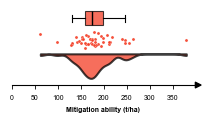

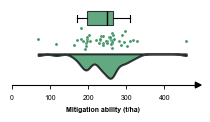

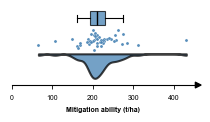

In [522]:
figs = integrated_cloudrain_carbon_analysis_single(df_analysis, us_states_4326)
for key, fig in figs.items():
    fig.savefig(f"figure/US_figure/cloudrain_{key}.png", dpi=300, facecolor="white", bbox_inches="tight")
    fig.savefig(f"figure/US_figure/cloudrain_{key}.pdf", dpi=300, facecolor="white", bbox_inches="tight")
    plt.show()


# 4、桑吉图

## 4.1 Calculation

In [249]:
# -*- coding: utf-8 -*-
import xarray as xr
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import box
from shapely.validation import make_valid
from rasterstats import zonal_stats
from rasterio.transform import from_origin
from scipy.spatial import cKDTree

# -----------------------------
# 路径参数
# -----------------------------
NC_PATH   = r'figure\draw_shp\Base_Pot_AGB_BGB_SOC_MgCha_500m.nc'
SHP_PATH  = r'data\cb_2018_us_state_500k.shp'
MERGED_CSV= r'data/US_data/df_merged_data_for_analysis.csv'

# -----------------------------
# 读取数据
# -----------------------------
ds = xr.open_dataset(NC_PATH)
var_name = 'Base_Pot_AGB_BGB_SOC_MgCha_500m'
carbon_var = ds[var_name] if var_name in ds else list(ds.data_vars.values())[0]
us_states = gpd.read_file(SHP_PATH).to_crs('EPSG:4326')

# 美国本土范围
usa_bbox = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)
buffer_deg = 2
lon_min = usa_bbox['lon_min'] - buffer_deg
lon_max = usa_bbox['lon_max'] + buffer_deg
lat_min = usa_bbox['lat_min'] - buffer_deg
lat_max = usa_bbox['lat_max'] + buffer_deg

# -----------------------------
# 预裁剪栅格
# -----------------------------
lat = carbon_var['lat'].values
lon = carbon_var['lon'].values
if lat[0] < lat[-1]:
    carbon_sub = carbon_var.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
    flip_needed = True
else:
    carbon_sub = carbon_var.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))
    flip_needed = False

arr = np.asarray(carbon_sub.squeeze().values, dtype=np.float32)
lat_sub = carbon_sub['lat'].values
lon_sub = carbon_sub['lon'].values
if arr.ndim > 2:
    arr = arr.squeeze()

if arr.size == 0 or len(lat_sub) < 2 or len(lon_sub) < 2:
    raise ValueError("裁剪后数据为空或网格分辨率不足")

# -----------------------------
# 构造 transform
# -----------------------------
res_lat = float(abs(lat_sub[1] - lat_sub[0]))
res_lon = float(abs(lon_sub[1] - lon_sub[0]))

if flip_needed:
    arr_rio = arr[::-1, :]
    lat_north = float(lat_sub.max())
else:
    arr_rio = arr
    lat_north = float(lat_sub[0])

west  = float(lon_sub.min()) - res_lon / 2.0
north = lat_north + res_lat / 2.0
transform = from_origin(west, north, res_lon, res_lat)

# -----------------------------
# 裁剪州边界
# -----------------------------
bbox_geom = box(usa_bbox['lon_min'], usa_bbox['lat_min'], usa_bbox['lon_max'], usa_bbox['lat_max'])
states_clip = us_states.clip(bbox_geom).copy()
states_clip = states_clip[states_clip.geometry.notnull() & ~states_clip.geometry.is_empty]

vals_all = arr_rio.ravel()
vals_all = vals_all[~np.isnan(vals_all)]
if vals_all.size == 0:
    raise ValueError("美国本土范围内没有有效像元")

    
quantiles = np.arange(0.1, 1.01, 0.1)

q_vals = np.quantile(vals_all, quantiles)
bins = [vals_all.min()] + list(q_vals)


# -----------------------------
# LNCS_expect 各分位数组的碳储量分布交叉分析
# -----------------------------
merged = pd.read_csv(MERGED_CSV)


# 三维交叉分析：PV分位数 → LNCS分位数 → 碳储量分位数
# -----------------------------
if all(col in merged.columns for col in ['pv_potential_dens', 'LNCS_expect', 'lat', 'lon']):
    print("\n" + "="*70)
    print("三维交叉分析：PV → LNCS → Carbon")
    print("="*70)
    
    # 1. 计算各指标的分位数并分组
    merged_valid = merged.dropna(subset=['pv_potential_dens', 'LNCS_expect', 'lat', 'lon']).copy()
    
    # PV 分位数分组
    pv_vals = merged_valid['pv_potential_dens']
    pv_q_vals = np.quantile(pv_vals, quantiles)
    pv_bins = [pv_vals.min()] + list(pv_q_vals)
    pv_labels = [f'PV_{i*10}-{(i+1)*10}%' for i in range(10)]
    merged_valid['PV_group'] = pd.cut(pv_vals, bins=pv_bins, labels=pv_labels, include_lowest=True, duplicates='drop')
    
    # LNCS 分位数分组
    lncs_vals = merged_valid['LNCS_expect']
    lncs_q_vals = np.quantile(lncs_vals, quantiles)
    lncs_bins = [lncs_vals.min()] + list(lncs_q_vals)
    lncs_labels = [f'LNCS_{i*10}-{(i+1)*10}%' for i in range(10)]
    merged_valid['LNCS_group'] = pd.cut(lncs_vals, bins=lncs_bins, labels=lncs_labels, include_lowest=True, duplicates='drop')
    
    # 2. 提取碳储量值
    print("提取碳储量值...")

    valid_mask = ~np.isnan(arr_rio)
    if not valid_mask.any():
        raise ValueError("栅格中没有任何有效像元，无法构建 KDTree")
    lat_grid, lon_grid = np.meshgrid(carbon_sub['lat'].values,
                                 carbon_sub['lon'].values,
                                 indexing='ij')
    valid_points = np.column_stack([
        lat_grid[valid_mask],
        lon_grid[valid_mask]
    ])
    valid_values = arr_rio[valid_mask].astype(float)
    tree = cKDTree(valid_points)

    print("\n提取站点碳储量值（KDTree 最近邻）...")
    carbon_vals = []
    for _, row in merged_valid.iterrows():
        if np.isnan(row['lat']) or np.isnan(row['lon']):
            carbon_vals.append(None)
            continue
        dist, idx = tree.query([row['lat'], row['lon']])
        carbon_vals.append(float(valid_values[idx]))

    merged_valid['carbon_val'] = carbon_vals
    nan_count = merged_valid['carbon_val'].isna().sum()
    print(f"carbon_val 中的 NaN 个数: {nan_count}")
    
    # Carbon 分位数分组（使用全局bins）
    carbon_labels = [f'C_{i*10}-{(i+1)*10}%' for i in range(10)]
    merged_valid['Carbon_group'] = pd.cut(merged_valid['carbon_val'], bins=bins, labels=carbon_labels, include_lowest=True, duplicates='drop')
    
    print(f"有效样本数: {len(merged_valid):,}")
    
else:
    print("\n提示：缺少必要列")

import plotly.graph_objects as go

if 'merged_valid' in locals() and len(merged_valid) > 0:
    # 1. 将10个分位数区间合并为3个大区间
    def merge_to_3groups(group_col):
        """将10个分位数组合并为低(0-30%)、中(30-70%)、高(70-100%)"""
        mapping = {}
        for i in range(10):
            old_label = group_col.cat.categories[i]
            if i < 3:
                mapping[old_label] = 'Low'
            elif i < 7:
                mapping[old_label] = 'Mid'
            else:
                mapping[old_label] = 'High'
        return group_col.map(mapping)
    
    df_sankey = merged_valid.copy()
    df_sankey['PV_3group'] = merge_to_3groups(df_sankey['PV_group'])
    df_sankey['LNCS_3group'] = merge_to_3groups(df_sankey['LNCS_group'])
    df_sankey['Carbon_3group'] = merge_to_3groups(df_sankey['Carbon_group'])
    




三维交叉分析：PV → LNCS → Carbon
提取碳储量值...

提取站点碳储量值（KDTree 最近邻）...
carbon_val 中的 NaN 个数: 0
有效样本数: 70,337


## 4.2 Sankey Plot

In [464]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.transforms import Affine2D
from sankeyflow import Sankey
import pandas as pd
import numpy as np
import copy

def plot_sankeyflow_pv_lncs_carbon(
    df_sankey: pd.DataFrame,
    pv_col: str = 'PV_3group',
    lncs_col: str = 'LNCS_3group',
    carbon_col: str = 'Carbon_3group',
    width_mm: float = 50,
    height_mm: float = 75,
    dpi: int = 300,
    png_path: str = "figure/US_figure/fig_sankey.png",
    pdf_path: str = "figure/US_figure/fig_sankey.pdf",
    level_order = ('Low', 'Mid', 'High'),
    node_width: float = 0.12,
    col_gap: float = 0.22,
    font_size: float = 6,
    flow_alpha: float = 0.45,
):
    plt.rcParams.update({
        'font.size': 5,
        'axes.titlesize': 5,
        'axes.labelsize': 5,
        'xtick.labelsize': 5,
        'ytick.labelsize': 5,
        'legend.fontsize': 5,
        'font.family': 'Arial'
    })
    if df_sankey.empty:
        raise ValueError("df_sankey 为空，无法绘制桑基图。")

    flow_pv_lncs = (
        df_sankey.groupby([pv_col, lncs_col]).size().reset_index(name='count')
    )
    flow_lncs_carbon = (
        df_sankey.groupby([lncs_col, carbon_col]).size().reset_index(name='count')
    )

    stage_palette = {
        'PV':     {'Low': '#b3c6f9', 'Mid': '#6387d6', 'High': '#264c96'},
        'LNCS':   {'Low': '#FFE5B2', 'Mid': '#FF9800', 'High': '#FF6F00'},
        'Carbon': {'Low': '#e0e0e0', 'Mid': '#bdbdbd', 'High': '#616161'},
    }

    def ordered_levels(series, wanted):
        exist = [x for x in wanted if x in set(series.dropna())]
        others = [x for x in series.dropna().unique().tolist() if x not in exist]
        return exist + others

    pv_levels     = ordered_levels(df_sankey[pv_col],     level_order)
    lncs_levels   = ordered_levels(df_sankey[lncs_col],   level_order)
    carbon_levels = ordered_levels(df_sankey[carbon_col], level_order)

    pv_totals     = df_sankey.groupby(pv_col).size().to_dict()
    lncs_totals   = df_sankey.groupby(lncs_col).size().to_dict()
    carbon_totals = df_sankey.groupby(carbon_col).size().to_dict()

    def fetch_node_color(stage, level):
        return stage_palette[stage].get(level, '#9e9e9e')

    def level_label(prefix, lv):
        return f"{prefix}\n{lv}"

    nodes = [
        [
            (
                f"PV_{lv}",
                int(pv_totals.get(lv, 0)),
                {
                    'color': fetch_node_color('PV', lv),
                    'label': level_label("PV", lv),
                    'label_pos': 'top',
                    'label_opts': {'fontsize': font_size}
                }
            )
            for lv in pv_levels
        ],
        [
            (
                f"LNCS_{lv}",
                int(lncs_totals.get(lv, 0)),
                {
                    'color': fetch_node_color('LNCS', lv),
                    'label': level_label("LNCS", lv),
                    'label_pos': 'top',
                    'label_opts': {'fontsize': font_size}
                }
            )
            for lv in lncs_levels
        ],
        [
            (
                f"Carbon_{lv}",
                int(carbon_totals.get(lv, 0)),
                {
                    'color': fetch_node_color('Carbon', lv),
                    'label': level_label("Carbon", lv),
                    'label_pos': 'top',
                    'label_opts': {'fontsize': font_size}
                }
            )
            for lv in carbon_levels
        ],
    ]

    nodes_adjusted = copy.deepcopy(nodes)

    def blend_colors(c1, c2, alpha):
        r1, g1, b1, _ = mcolors.to_rgba(c1)
        r2, g2, b2, _ = mcolors.to_rgba(c2)
        return ((r1 + r2) / 2, (g1 + g2) / 2, (b1 + b2) / 2, alpha)


    flows = []
    flow_labels = []

    best_lncs = (
        flow_pv_lncs.assign(total=flow_pv_lncs[lncs_col].map(lncs_totals))
        .assign(ratio=lambda df: df['count'] / df['total'])
        .replace({'ratio': {np.inf: np.nan}})
        .dropna(subset=['ratio', 'total'])
        .sort_values('ratio', ascending=False)
        .drop_duplicates(subset=lncs_col)
        .set_index(lncs_col)
    )
    for _, row in flow_pv_lncs.iterrows():
        src = f"PV_{row[pv_col]}"
        dst = f"LNCS_{row[lncs_col]}"
        value = int(row['count'])
        color = blend_colors(
            fetch_node_color('PV', row[pv_col]),
            fetch_node_color('LNCS', row[lncs_col]),
            flow_alpha,
        )
        flows.append((src, dst, value, {'color': color}))

        if row[lncs_col] in best_lncs.index and row[pv_col] == best_lncs.loc[row[lncs_col], pv_col]:
            ratio = float(best_lncs.loc[row[lncs_col], 'ratio'])
            flow_labels.append((dst, ratio))

    for _, row in flow_lncs_carbon.iterrows():
        src = f"LNCS_{row[lncs_col]}"
        dst = f"Carbon_{row[carbon_col]}"
        value = int(row['count'])
        color = blend_colors(
            fetch_node_color('LNCS', row[lncs_col]),
            fetch_node_color('Carbon', row[carbon_col]),
            flow_alpha,
        )
        flows.append((src, dst, value, {'color': color}))

    sankey = Sankey(
        node_width=node_width,
        node_pad_y_min=col_gap,
        node_pad_y_max=col_gap,
        align_y='top',
        flow_color_mode='',
        node_opts={'label_format': '{label}'},
        flow_opts={'curvature': 0.35},
    )
    sankey.sankey(flows=flows, nodes=nodes_adjusted)

    fig_w, fig_h = width_mm / 25.4, height_mm / 25.4
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    sankey.draw(ax=ax)

    rotation = Affine2D().rotate_deg(90).translate(1, 0)
    combined_transform = rotation + ax.transData

    for artist in list(ax.patches) + list(ax.collections) + list(ax.lines):
        if hasattr(artist, "set_transform"):
            artist.set_transform(combined_transform)
    
    # pv_nodes = {node.name: node for node in sankey.nodes[0]}
    # for lncs_name, ratio in flow_labels:
    #     lncs_level = lncs_name.replace('LNCS_', '')
    #     if lncs_level not in best_lncs.index:
    #         continue
    #     pv_src = best_lncs.loc[lncs_level, pv_col]
    #     pv_node = pv_nodes.get(f"PV_{pv_src}")
    #     if pv_node and pv_node.artist:
    #         rect = pv_node.artist
    #         cx = rect.get_x() + rect.get_width() / 2
    #         cy = rect.get_y() + rect.get_height()
    #         ax.text(
    #             cx,
    #             cy + 0.02,
    #             f"{ratio*100:.1f}%",
    #             transform=combined_transform,
    #             ha='center',
    #             va='bottom',
    #             fontsize=font_size,
    #             color='#333333',
    #         )

    for text in ax.texts:
        if text.get_text().endswith('%'):
            continue
        text.set_transform(combined_transform)
        text.set_rotation(0)
        text.set_rotation_mode('anchor')
        text.set_ha('left')
        text.set_va('center')
        x, y = text.get_position()
        label = text.get_text()
        if label.startswith("PV"):
            # 第二，第三个'PV'分开控制
            if not hasattr(ax, "_pv_shown"):
                # 第一个'PV'，显示大写标签
                ax.text(x, y + 0.11, 'PV', transform=text.get_transform(),
                        rotation=0, rotation_mode='anchor', ha='left', va='center', fontsize=5)
                text.set_text(label[2:])
                text.set_position((x + 0.04, y - 0.03))
                ax._pv_shown = 1
            elif ax._pv_shown == 1:
                # 第二个'PV'
                text.set_text(label[2:])
                text.set_position((x + 0.04, y - 0.07))
                ax._pv_shown = 2
            else:
                # 第三个及以上
                text.set_text(label[2:])
                text.set_position((x + 0.04, y - 0.04))
        elif label.startswith("LNCS"):
            if not hasattr(ax, "_lncs_shown"):
                ax.text(x, y + 0.15, 'LNCS', transform=text.get_transform(),
                        rotation=0, rotation_mode='anchor', ha='left', va='center', fontsize=5)
                text.set_text(label[4:])
                text.set_position((x + 0.03, y - 0.03))
                ax._lncs_shown = 1
            elif ax._lncs_shown == 1:
                text.set_text(label[4:])
                text.set_position((x + 0.03, y - 0.07))
                ax._lncs_shown = 2
            else:
                text.set_text(label[4:])
                text.set_position((x + 0.03, y - 0.04))
        elif label.startswith("Carbon"):
            if not hasattr(ax, "_carbon_shown"):
                # 第一个'Carbon'，显示大写标签
                ax.text(x, y + 0.18, 'Carbon', transform=text.get_transform(),
                        rotation=0, rotation_mode='anchor', ha='left', va='center', fontsize=5)
                text.set_text(label[6:])
                text.set_position((x + 0.03, y))
                ax._carbon_shown = 1
            elif ax._carbon_shown == 1:
                # 第二个'Carbon'，单独控制
                text.set_text(label[6:])
                text.set_position((x + 0.03, y - 0.08))
                ax._carbon_shown = 2
            else:
                # 第三个及以上
                text.set_text(label[6:])
                text.set_position((x + 0.03, y - 0.04))
        else:
            text.set_position((x + 0.1, y - 0.05))

    ax.set_xlim(-0.08, 1.01)
    ax.set_ylim(-0.08, len(nodes) - 1 + node_width + 0.02)
    ax.set_aspect('auto')
    ax.set_axis_off()
    # 添加面板标签b
    ax.text(-0.1, 1.1, 'c', transform=ax.transAxes,
            ha='left', va='top', fontsize=7, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, pad=0.2, lw=0), zorder=100)
    fig.tight_layout()


    fig.savefig(png_path, dpi=dpi, facecolor='white')
    fig.savefig(pdf_path, facecolor='white')

    return fig, ax

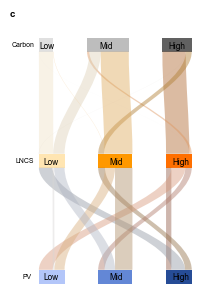

In [465]:
fig = plot_sankeyflow_pv_lncs_carbon(df_sankey)


# 5、汇总图

## 5.1 Load data

In [461]:
df_analysis=pd.read_csv(r'data\US_data\df_merged_data_for_analysis.csv')
df_weight = pd.read_csv('data/US_data/df_weight.csv')



emission_intensity = pd.DataFrame({
    'year': ['2018',  '2030', '2035', '2040'],
    'CO2_g_per_kWh': [400.3,  302,  279.2, 261.1]
})
# Transform pv_transform (2020 emission factor) to 2030, 2040, 2050 using emission_intensity
pv_transform_2020 = 352  
# Interpolate emission intensity for 2020, 2030, 2040, 2050
years_target = [2020, 2030, 2040, 2050]
em_factors = np.interp(
    years_target,
    emission_intensity['year'].astype(int),
    emission_intensity['CO2_g_per_kWh']
)

# Calculate scaling factors relative to 2020
scaling_factors = em_factors / em_factors[0]

# 生成一个pv_transfer的dataframe
pv_transfer = pd.DataFrame({
    'year': [2020, 2030, 2040, 2050],
    'pv_transform': [pv_transform_2020] + list(pv_transform_2020 * scaling_factors[1:])
})

# 计算每10年区间的累计光伏转化能力，并最终汇总到2050
years = [2020, 2030, 2040, 2050]

for idx in range(len(years)-1):
    y_start, y_end = years[idx], years[idx+1]
    pv_start = pv_transfer.loc[pv_transfer['year'] == y_start, 'pv_transform'].values[0]
    pv_end = pv_transfer.loc[pv_transfer['year'] == y_end, 'pv_transform'].values[0]
    # 线性插值每年pv_transform，累计10年
    pv_sum = 0
    for y in range(y_start, y_end):
        pv_y = pv_start + (pv_end - pv_start) * (y - y_start) / (y_end - y_start)
        pv_sum += df_analysis['E_yr_pixel'] * pv_y / 1000 / 1000 * 0.27 / (df_analysis['area_m2'] / 10000)
    df_analysis[f'pv_potential_{y_start}_{y_end-1}_sum'] = pv_sum

# 汇总2020-2050累计值，汇总site的累计光伏减排能力(t C)
df_analysis['pv_potential_total(t)'] = sum(
    df_analysis[f'pv_potential_{years[i]}_{years[i+1]-1}_sum'] for i in range(len(years)-1)
)

df_analysis['power_generation_kwha'] = df_analysis['E_yr_pixel'] * 30 / df_analysis['area_m2'] * 10000

In [462]:
emission_data = df_analysis[['lat', 'lon', 'Expectation_net_benefit','LNCS_expect',
                            'area_m2', 'pv_potential_dens', 'power_generation_kwha',
                            'pv_potential_2020_2029_sum', 'pv_potential_2030_2039_sum','pv_potential_2040_2049_sum'
                           ]].copy()
variable_weight=['weighted_density_Agricultural','weighted_density_Forest','weighted_density_Vegetation']
emission_data_merge = emission_data.rename(columns={'Expectation_net_benefit': 'Expectation_net_benefit'})
variable_lncs = ['final_forest', 'final_agro', 'final_veg']
lncs_data = df_weight[['lat', 'lon'] + variable_lncs + variable_weight]
emission_data_merge = emission_data_merge.merge(lncs_data, on=['lat', 'lon'], how='left')

emission_data_merge

,lat,lon,Expectation_net_benefit,LNCS_expect,area_m2,pv_potential_dens,power_generation_kwha,pv_potential_2020_2029_sum,pv_potential_2030_2039_sum,pv_potential_2040_2049_sum,final_forest,final_agro,final_veg,weighted_density_Agricultural,weighted_density_Forest,weighted_density_Vegetation
0,25.295834,-80.287500,4756.489612,811.854595,776295.361002,5568.344207,7.567199e+07,2167.108342,1770.850632,1630.385232,811.84186,764.000000,844.84770,0.000367,0.998714,0.000918
1,25.437500,-80.537500,4098.985904,1348.189022,775385.854124,5447.174926,7.402534e+07,2119.951244,1732.316251,1594.907432,1391.45790,1102.152466,1138.81860,0.007830,0.829869,0.162302
2,25.437500,-80.495834,4467.282818,971.186274,775385.854124,5438.469092,7.390703e+07,2116.563075,1729.547612,1592.358404,1028.14750,750.145691,782.05790,0.022229,0.771417,0.206354
3,25.445833,-80.454170,4460.638370,972.811005,775332.207938,5433.449375,7.383881e+07,2114.609484,1727.951237,1590.888654,1028.14750,756.315613,787.59076,0.007369,0.770923,0.221708
4,25.445833,-80.404170,4486.467516,968.544647,775332.207938,5455.012162,7.413184e+07,2123.001367,1734.808657,1597.202138,1053.12240,728.004333,772.76874,0.099801,0.714253,0.185946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,48.995834,-99.995834,4247.886562,377.830800,563356.382622,4625.717362,6.286200e+07,1800.253417,1471.075460,1354.388485,377.83080,324.812927,357.41420,0.000000,1.000000,0.000000
70333,48.995834,-99.987500,4312.480812,307.516600,563356.382622,4619.997412,6.278426e+07,1798.027306,1469.256395,1352.713711,307.51660,262.768982,266.84415,0.000000,1.000000,0.000000
70334,48.995834,-99.895836,4260.343608,324.674320,563356.382622,4585.017928,6.230891e+07,1784.413864,1458.132183,1342.471881,324.67432,273.972321,343.00000,0.000000,1.000000,0.000000
70335,48.995834,-99.887500,4264.916125,323.374660,563356.382622,4588.290785,6.235338e+07,1785.687606,1459.173021,1343.430158,323.37466,273.972321,338.53870,0.000000,1.000000,0.000000


## 5.2 Bar chart

PV潜力分段: 34.162193, 27.915605, 25.701315
PV潜力累积: [34.162193152633726, 62.07779854695353, 87.77911404425392]
LNCS分段: 3.434065, 0.237816, 0.610395
LNCS累积: [3.4340653365130858, 3.6718813167001825, 4.282276437904286]
发电量 (T kWh): 3.22e+02
累积柱状图生成完成！
PV潜力 (Gt CO₂): 87.779114
LNCS (Gt CO₂): 4.282276
发电量 (T kWh): 3.22e+02


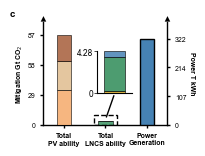

In [515]:
from matplotlib.patches import FancyArrowPatch


def plot_cumulative_bar_charts(emission_data_merge, figsize_mm=(50, 35)):
    """
    绘制累积柱状图
    第一个order: PV潜力累积柱状图
    第二个order: LNCS累积柱状图  
    第三个order: 发电量柱状图（副Y轴）
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.patches import Rectangle, ConnectionPatch
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    # ---------- 样式 ----------
    plt.rcParams.update({
        'font.size': 5,
        'axes.labelsize': 5,
        'xtick.labelsize': 5,
        'ytick.labelsize': 5,
        'legend.fontsize': 5,
        'font.family': 'Arial'
    })

    width_in = figsize_mm[0] / 25.4
    height_in = figsize_mm[1] / 25.4

    # ---------- 数据 ----------
    required_cols = [
        'pv_potential_2020_2029_sum', 'pv_potential_2030_2039_sum', 'pv_potential_2040_2049_sum',
        'final_forest', 'final_agro', 'final_veg', 'weighted_density_Forest', 
        'weighted_density_Agricultural', 'weighted_density_Vegetation',
        'power_generation_kwha', 'area_m2'
    ]
    missing = [c for c in required_cols if c not in emission_data_merge.columns]
    if missing: raise ValueError(f"缺少必要的列: {missing}")

    # 面积转换为公顷
    area_ha = emission_data_merge['area_m2'].values / 10000

    # ---------- 计算数据 ----------
    # 1. PV潜力累积 (Gt CO2)
    pv_2020_2029 = (emission_data_merge['pv_potential_2020_2029_sum'] * area_ha).sum() / 0.27 / 1e9
    pv_2030_2039 = (emission_data_merge['pv_potential_2030_2039_sum'] * area_ha).sum() / 0.27 / 1e9
    pv_2040_2049 = (emission_data_merge['pv_potential_2040_2049_sum'] * area_ha).sum() / 0.27 / 1e9
    pv_cumulative = [pv_2020_2029, pv_2020_2029 + pv_2030_2039, pv_2020_2029 + pv_2030_2039 + pv_2040_2049]

    # 2. LNCS累积 (Gt CO2) - 参照PV的处理方式
    lncs_forest = (emission_data_merge['final_forest'] * emission_data_merge['weighted_density_Forest'] * area_ha).sum() / 0.27 / 1e9
    lncs_agro = (emission_data_merge['final_agro'] * emission_data_merge['weighted_density_Agricultural'] * area_ha).sum() / 0.27 / 1e9
    lncs_veg = (emission_data_merge['final_veg'] * emission_data_merge['weighted_density_Vegetation'] * area_ha).sum() / 0.27 / 1e9
    lncs_cumulative = [lncs_forest, lncs_forest + lncs_agro, lncs_forest + lncs_agro + lncs_veg]

    # 3. 发电量 (T kWh) - 除以1e12转换为T kWh
    power_total = (emission_data_merge['power_generation_kwha'] * area_ha).sum() / 1e12

    # 调试输出
    print(f"PV潜力分段: {pv_2020_2029:.6f}, {pv_2030_2039:.6f}, {pv_2040_2049:.6f}")
    print(f"PV潜力累积: {pv_cumulative}")
    print(f"LNCS分段: {lncs_forest:.6f}, {lncs_agro:.6f}, {lncs_veg:.6f}")
    print(f"LNCS累积: {lncs_cumulative}")
    print(f"发电量 (T kWh): {power_total:.2e}")

    # ---------- 画布 ----------
    fig, ax = plt.subplots(1, 1, figsize=(width_in, height_in))

    # ---------- 绘制柱状图 ----------
    x_pos = np.arange(3)  # 3个order
    width = 0.35  # 收窄柱子

    # 第三个order: 
    ax2 = ax.twinx()
    if power_total > 0:  
        power_bars = ax2.bar(x_pos[2], power_total, width,
                             color='#4682B4', alpha=1, edgecolor='black', linewidth=1,
                             label='Power', zorder=2)

    # ---------- 绘制分段累积效果 ----------
    # PV分段
    if pv_cumulative[-1] > 0:
        pv_segments = [pv_2020_2029, pv_2030_2039, pv_2040_2049]
        pv_colors = ['#F4A460', '#DEB887', '#A0522D']  
        bottom = 0
        for i, (seg, color) in enumerate(zip(pv_segments, pv_colors)):
            if seg > 0: 
                ax.bar(x_pos[0], seg, width, bottom=bottom, color=color, alpha=0.8, 
                       edgecolor='black', linewidth=0.5, zorder=3)
                bottom += seg

    # LNCS分段
    if lncs_cumulative[-1] > 0:
        lncs_segments = [lncs_agro, lncs_forest, lncs_veg]
        lncs_colors = ['#DAA520', '#2E8B57', '#4682B4']  
        bottom = 0
        for i, (seg, color) in enumerate(zip(lncs_segments, lncs_colors)):
            if seg > 0:
                ax.bar(x_pos[1], seg, width, bottom=bottom, color=color, alpha=0.8,
                       edgecolor='black', linewidth=0.5, zorder=3)
                bottom += seg

    # ---------- 坐标轴设置 ----------
    # X轴
    ax.set_xticks(x_pos)
    ax.set_xticklabels(['Total\nPV ability', 'Total\nLNCS ability', 'Power\nGeneration'], fontsize=6, fontweight='bold')
    ax.set_xlim(-0.5, 2.5)

    # 主Y轴设置 - 确保包含所有非零值
    main_values = []
    if pv_cumulative[-1] > 0:
        main_values.append(pv_cumulative[-1])
    if lncs_cumulative[-1] > 0:
        main_values.append(lncs_cumulative[-1])

    if main_values:
        max_main = max(main_values)
        ax.set_ylim(0, max_main * 1.15)
    else:
        ax.set_ylim(0, 1)  # 默认范围

    # 设置主Y轴刻度（1位小数）
    main_ticks = np.linspace(0, max_main * 1.0, 4)
    ax.set_yticks(main_ticks)
    ax.set_yticklabels([f'{int(t)}' for t in main_ticks], fontsize=5)
    ax.tick_params(axis='y', labelsize=5, length=2, width=1, colors='black', labelcolor='black')
    ax.tick_params(axis='x', labelsize=5, length=2, width=1)

    # 副Y轴设置
    if power_total > 0:
        main_min, main_max = ax.get_ylim()
        power_min, power_max = 0, power_total * 1.2
        ax2.set_ylim(power_min, power_max)
        ax2.set_yticks([])
        ax2.spines['right'].set_visible(False)

        def power_to_main(y):
            return main_min + (y - power_min) * (main_max - main_min) / (power_max - power_min)
        def main_to_power(y):
            return power_min + (y - main_min) * (power_max - power_min) / (main_max - main_min)

        secax = ax.secondary_yaxis('right', functions=(main_to_power, power_to_main))
        ticks_power = np.linspace(power_min, power_max/1.2, 4)
        secax.set_yticks(ticks_power)
        secax.set_yticklabels([f'{int(t)}' for t in ticks_power], fontsize=5)
        secax.tick_params(axis='y', labelsize=5,length=2, width=1)
        secax.tick_params(axis='x', labelsize=5, length=2, width=1)

        # ----- Add Y-axis arrow for secondary y-axis (right) -----

        y0, y1 = ax2.get_ylim()
        arrow_y2 = FancyArrowPatch(
            (1.0, y1 * 1.0), (1.0, y1 * 1.08),           # 右侧边缘，向上略超出
            transform=ax2.get_yaxis_transform(),          # 绑定到 ax2 的 y 轴变换
            clip_on=False,
            arrowstyle='simple',
            facecolor='black', edgecolor='black',         # 明确填充色
            mutation_scale=8,
            linewidth=0,
            zorder=10
        )
        ax2.add_patch(arrow_y2)   # ← 别忘了添加到轴


    else:
        ax2.set_ylim(0, 1)
        ax2.set_yticks([])
        ax2.spines['right'].set_visible(False)

    # ax2.tick_params(axis='y', labelsize=6, length=2, width=1, colors='black', labelcolor='black')

    # # 网格
    # ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.3, axis='y')

    # ---------- LNCS放大框（根据数据调整，进一步放大） ----------
    if lncs_cumulative[-1] > 0 and lncs_cumulative[-1] < max_main * 0.1:
        lncs_center = x_pos[1]                 # 第二组中心
        y_zoom_max = lncs_cumulative[-1] * 1.2 # 增加放大范围

        # 1) 主图中的"脚印"框：与 LNCS 柱同中心，稍宽一些，覆盖 [0, y_zoom_max]，改为虚线
        rect_w  = width * 1.6
        height_scale = 1.8  # 高度变大
        rect_x0 = lncs_center - rect_w / 2 + 0.
        footprint = Rectangle(
            (rect_x0, 0), rect_w, y_zoom_max * height_scale,
            fill=False, edgecolor='black', linewidth=1, zorder=9, linestyle='--'
        )
        ax.add_patch(footprint)

        # 2) 放大窗口：锚到 LNCS 正上方，且在 Y 方向居中（axes 坐标 0~1）
        xmin, xmax = ax.get_xlim()
        x_rel = (lncs_center - xmin) / (xmax - xmin) - 0.1 
        y_rel = 0.30                                  # 在 Y 方向中部（

        zoom_ax = inset_axes(
            ax,
            width=0.35, height=0.5,             
            bbox_to_anchor=(x_rel, y_rel, 0.35, 0.5),  # 提供4元组 (x, y, width, height)
            bbox_transform=ax.transAxes,
            loc='center', borderpad=0
        )

        # 放大窗口画 LNCS 的堆叠分段；y 范围与脚印一致
        zoom_ax.set_ylim(0, y_zoom_max)
        zoom_ax.set_xlim(0, 1)
        bottom = 0
        for seg, color in zip([lncs_agro, lncs_forest, lncs_veg],
                              ['#DAA520', '#2E8B57', '#4682B4']):
            if seg > 0:
                zoom_ax.bar(0.5, seg, 0.6, bottom=bottom,
                            color=color, alpha=0.85,
                            edgecolor='black', linewidth=0.5)
                bottom += seg

        # 简洁刻度与标签 - 去掉Y轴标签，缩短y轴
        zoom_ax.set_xticks([])
        zoom_ax.set_yticks([0, lncs_cumulative[-1]])
        zoom_ax.set_yticklabels(['0', f'{lncs_cumulative[-1]:.2f}'], fontsize=5)
        zoom_ax.tick_params(axis='y', labelsize=6, length=2, width=0.5, pad=1)
        zoom_ax.spines['left'].set_bounds(0, lncs_cumulative[-1])  # 只显示y轴短段
        # 注释掉Y轴标签
        # zoom_ax.set_ylabel('LNCS Detail', fontsize=5, fontweight='bold')

        # 窗口边框：只保留左、下
        for s in ['top', 'right']:
            zoom_ax.spines[s].set_visible(False)
        for s in ['left', 'bottom']:
            zoom_ax.spines[s].set_visible(True)
            zoom_ax.spines[s].set_linewidth(0.8)
            zoom_ax.spines[s].set_color('black')

    # 3) 单条连接线：脚印顶边中心 -> 放大窗口底边中心
    ax.annotate(
        '', xy=(0.5, 0), xycoords=zoom_ax.transAxes,      # 目标：窗口底边中心
        xytext=(lncs_center, y_zoom_max), textcoords=ax.transData,  # 起点：脚印顶边中心
        arrowprops=dict(arrowstyle='-', color='black', lw=1.0)
    )
    arrow_y = FancyArrowPatch(
        (0, ax.get_ylim()[1] * 1.0),
        (0, ax.get_ylim()[1] * 1.08),
        transform=ax.get_yaxis_transform(),
        clip_on=False,
        arrowstyle='simple',
        color='black',
        mutation_scale=8,
        linewidth=0
    )
    ax.add_patch(arrow_y)

    # # 标签
    # ax.annotate('PV & LNCS', xy=(0.02, 0.99), xycoords='axes fraction',
    #             ha='left', va='top', fontweight='bold', fontsize=6, color='black')
    # ax.annotate(r'(Gt CO$_2$)', xy=(0.02, 0.94), xycoords='axes fraction',
    #             ha='left', va='top', fontweight='bold', fontsize=6, color='black')

    # # ax2.set_ylabel('Power Generation', fontsize=6, fontweight='bold', labelpad=2, color='black')
    # ax2.annotate('PV Power', xy=(0.98, 0.99), xycoords='axes fraction',
    #         ha='right', va='top', fontweight='bold', fontsize=6, color='black')
    # ax2.annotate(r'(T kWh)', xy=(0.98, 0.94), xycoords='axes fraction',
    #             ha='right', va='top', fontweight='bold', fontsize=6, color='black')
    # ax.axvline((x_pos[1] + x_pos[2]) / 2.0,
    #        color='red', linestyle='--', linewidth=1, alpha=1, zorder=10)
    ax.set_ylabel('Mitigation Gt CO$_2$', fontsize=5, fontweight='bold', color='black', labelpad=2)

    ax2.set_ylabel('Power T kWh', fontsize=5, fontweight='bold', color='black', labelpad=20, rotation=270)

    # 边框设置
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')

    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['right'].set_visible(False)  
    ax2.spines['bottom'].set_visible(False)

    # 确保secax的右脊线与主Y轴左脊线宽度一致
    secax.spines['right'].set_linewidth(1)
    secax.spines['right'].set_color('black')

    # 布局位置
    ax.set_position([0.18, 0.15, 0.63, 0.75]) 

    # 面板标签
    fig.text(0.01, 0.99, 'c', ha='left', va='top',
             fontsize=7, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.85, pad=0, lw=0))

    print("累积柱状图生成完成！")
    print(f"PV潜力 (Gt CO₂): {pv_cumulative[-1]:.6f}")
    print(f"LNCS (Gt CO₂): {lncs_cumulative[-1]:.6f}")
    print(f"发电量 (T kWh): {power_total:.2e}")
    
    return fig

# 执行函数
fig = plot_cumulative_bar_charts(emission_data_merge)

# 保存图片
filename_png = "figure/US_figure/cumulative_bar_charts.png"
filename_pdf = "figure/US_figure/cumulative_bar_charts.pdf"
fig.savefig(filename_png, dpi=300, facecolor='white', pad_inches=0.1)
fig.canvas.draw()
fig.savefig(filename_pdf, dpi=300, facecolor='white', pad_inches=0.1)
plt.show()
plt.close(fig)

# DD function

In [ ]:
# def _render_terrain(ax, dem_data, usa_bounds_main, transformer):
#     """渲染地形"""
#     qm = None
#     dem_lon = dem_data.x.values
#     dem_lat = dem_data.y.values
#     lon_mask = (dem_lon >= usa_bounds_main['lon_min']) & (dem_lon <= usa_bounds_main['lon_max'])
#     lat_mask = (dem_lat >= usa_bounds_main['lat_min']) & (dem_lat <= usa_bounds_main['lat_max'])
    
#     if lon_mask.any() and lat_mask.any():
#         lon_idx = np.where(lon_mask)[0]
#         lat_idx = np.where(lat_mask)[0]
        
#         # 抽稀栅格
#         step_x = max(1, len(lon_idx)//1800)
#         step_y = max(1, len(lat_idx)//900)
#         lon_sub = lon_idx[::step_x]
#         lat_sub = lat_idx[::step_y]
#         elev = dem_data.squeeze().values[np.ix_(lat_sub, lon_sub)]

#         mask = ~np.isnan(elev)
#         if mask.any():
#             lo = np.nanpercentile(elev, 35)
#             elev[elev < lo] = np.nan

#             # 地形配色
#             terrain_colors = ListedColormap(["#ffffff", "#eef3ef", "#dfe8e0",
#                                            "#d2ddcf", "#c7d1c1", "#b7c2af"])
#             terrain_colors.set_bad((0, 0, 0, 0))
#             qs = np.nanpercentile(elev, [35, 50, 65, 78, 88, 98])
#             norm = BoundaryNorm(qs, terrain_colors.N)

#             lon_grid, lat_grid = np.meshgrid(dem_lon[lon_sub], dem_lat[lat_sub])
#             gx, gy = transformer.transform(lon_grid, lat_grid)            
#             qm = ax.pcolormesh(gx, gy, elev, cmap=terrain_colors, norm=norm,
#                               shading='auto', alpha=0.55, antialiased=False, zorder=1)
#             qm.set_clip_on(True)
    
#     return qm


# def _draw_glow_outline_outside(ax, gdf_albers, line_color="#444444", line_width=0.8,
#                               widths_km=(0, 30, 50), alphas=(0.95, 0.5, 0.3), 
#                               colors=("#08336e", "#105ca4", "#3888c0")):
#     """绘制国界线光晕效果"""
#     g = gdf_albers.copy()
#     geom = unary_union(g.geometry)
    
#     if make_valid is not None:
#         geom = make_valid(geom)
#     else:
#         geom = geom.buffer(0)

#     radii_m = [k*1000.0 for k in widths_km]
#     ordered = list(zip(radii_m, alphas, colors))
#     ordered.sort(key=lambda x: x[0])

#     last_inner = geom.buffer(0, join_style=2, cap_style=2)
#     glow_meshes = []
    
#     for i, (r, alpha, color) in enumerate(ordered):
#         outer = geom.buffer(r, join_style=2, cap_style=2)
#         ring = outer.difference(last_inner)
#         if not ring.is_empty:
#             glow_series = gpd.GeoSeries([ring], crs=g.crs)
#             glow_mesh = glow_series.plot(ax=ax, color=color, alpha=alpha, edgecolor="none",
#                                        zorder=8.2 + i*0.01)
#             glow_meshes.append(glow_mesh)
#         last_inner = outer

#     g.boundary.plot(ax=ax, color=line_color, linewidth=line_width, zorder=9.6)
#     return glow_meshes



# def _draw_background_map(ax, usa_bounds_main):
#     """绘制背景地图"""
#     try:
#         bbox_expanded = box(
#             usa_bounds_main['lon_min'] - 3, usa_bounds_main['lat_min'] - 3,
#             usa_bounds_main['lon_max'] + 3, usa_bounds_main['lat_max'] + 3
#         )
#         helper_gdf = gpd.read_file(r'figure\draw_shp\ne_110m_land.shp').to_crs(4326)
#         helper_gdf = helper_gdf.clip(bbox_expanded)
        
#         if 'featurecla' in helper_gdf.columns:
#             helper_gdf = helper_gdf[helper_gdf['featurecla'].str.contains('Land', na=False)]
        
#         if make_valid is not None:
#             helper_gdf['geometry'] = helper_gdf.geometry.map(make_valid)
#         else:
#             helper_gdf['geometry'] = helper_gdf.geometry.buffer(0)
            
#         helper_gdf = helper_gdf[helper_gdf.geometry.geom_type.isin(['Polygon', 'MultiPolygon'])]
#         helper_gdf = helper_gdf.explode(index_parts=False, ignore_index=True)
#         helper_gdf_proj = helper_gdf.to_crs('ESRI:102003')
#         helper_gdf_proj['geometry'] = helper_gdf_proj.buffer(0)
#         helper_gdf_proj.plot(ax=ax, facecolor='white', edgecolor='lightgray',
#                            linewidth=0.3, alpha=1, zorder=0.5)
#     except Exception as e:
#         print(f"Helper map error: {e}")

# def _add_colorbar(fig, ax, scatter, var_bins, variable_name, unit, var_values, colors):
#     """添加颜色条到背景地图下方，并在上方显示数据分布曲线+柱状图"""
#     def add_horizontal_cbar_equiv(fig, ax, mappable, var_bins, variable_name, unit_display=None, var_values=None, colors=None):
#         # 获取主地图位置
#         pos = ax.get_position()
        
#         # colorbar放在底部，背景地图下方
#         left = pos.x0 + 0.2 * pos.width
#         bottom = 0.05  # 固定在底部
#         width = 0.55 * pos.width
#         height = 0.035  # colorbar高度

#         cax = fig.add_axes([left, bottom, width, height])
#         cax.set_in_layout(False)
#         cax.set_zorder(50)  
#         cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')

#         cb.set_ticks(var_bins[1::2])

#         # 格式化刻度标签
#         tick_vals = var_bins[1::2]
#         if variable_name == 'avg_npv':
#             tick_labels = [f'{v/1_000:.2f}' for v in tick_vals]
#         elif variable_name == 'predicted_prob':
#             tick_labels = [f'{v:.2f}' for v in tick_vals]
#         elif variable_name == 'Expectation_net_benefit':
#             tick_labels = [f'{v/1_000:.2f}' for v in tick_vals]
#         else:
#             tick_labels = [f'{v:.0f}' for v in tick_vals]
#         cb.set_ticklabels(tick_labels)

#         # 细长
#         cax.tick_params(axis='x', which='major', length=2.5, width=0.5, pad=1, labelsize=5)
#         cax.tick_params(axis='x', which='minor', length=1.5, width=0.4, label1On=False)
#         cb.outline.set_linewidth(0.7)

#         # 百分位标签
#         percentile_labels = [f'Top{p}' for p in range(10, 101, 20)][::-1]
#         major_tick_locs = cb.get_ticks()
#         for loc, label in zip(major_tick_locs, percentile_labels):
#             # 使用colorbar坐标系统的正确定位方式
#             x_disp = cax.transData.transform((loc, 0))[0]
#             x_frac = cax.transAxes.inverted().transform((x_disp, 0))[0]
#             cax.text(x_frac, 1.15, label, transform=cax.transAxes,
#                     ha='center', va='bottom', fontsize=5, clip_on=False)
#         cax.text(1.08, 1.3, "(%)", ha='center', va='bottom', fontsize=5, 
#                 fontweight='bold', transform=cax.transAxes)

#         # ========== 添加数据分布曲线和柱状图 ==========
#         chart_ax = None  # 初始化以便后续引用
#         if var_values is not None and colors is not None:
#             # 创建图表坐标轴，位置在colorbar上方
#             chart_height = 0.11  # 图表高度
#             chart_bottom = bottom + height + 0.05  # 在colorbar上方
            
#             chart_ax = fig.add_axes([left, chart_bottom, width, chart_height])
#             chart_ax.set_in_layout(False)
#             chart_ax.set_zorder(51)
            
#             clean_values = var_values[~np.isnan(var_values)]
#             if len(clean_values) > 0:
#                 # 1. 绘制柱状图（底层）- 使用10%分位数组
#                 # 定义10个分位数组 (0-10%, 10-20%, ..., 90-100%)
#                 percentiles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#                 bin_edges = np.percentile(clean_values, percentiles)
                
#                 # 计算每个10%分位数段的数据值和颜色
#                 bar_heights = []
#                 bar_positions = []
#                 bar_colors = []
#                 bar_widths = []
                
#                 for i in range(10):
#                     bin_min = bin_edges[i]
#                     bin_max = bin_edges[i+1]
                    
#                     # x位置为该分位数段的中间值（百分比）
#                     bar_positions.append((percentiles[i] + percentiles[i+1]) / 2)
                    
#                     # 计算该分位数段的数据密度
#                     count_in_bin = len(clean_values[(clean_values >= bin_min) & (clean_values <= bin_max)])
#                     # y值为该分位数段的平均数值
#                     mean_value = np.mean(clean_values[(clean_values >= bin_min) & (clean_values <= bin_max)])
                    
#                     # 归一化y值到0-1范围
#                     y_norm = (mean_value - var_bins.min()) / (var_bins.max() - var_bins.min())
#                     bar_heights.append(y_norm)
                    
#                     # 柱子宽度
#                     bar_widths.append(10)  # 每个柱子宽度为10%
                    
#                     # 确定颜色
#                     bar_colors.append(colors[i])
                
#                 # 绘制柱子（背景）
#                 for i in range(10):
#                     chart_ax.bar(bar_positions[i], bar_heights[i], width=bar_widths[i],
#                                 color=bar_colors[i], alpha=0.4, edgecolor='none')
                
#                 # 2. 绘制曲线（顶层）- 使用每个bin的中心点
#                 chart_ax.plot(bar_positions, bar_heights, color='#333333', linewidth=1.2, alpha=0.8, zorder=10)
                
#                 # 设置x轴范围：0-100%（对应优先级/分位数）
#                 chart_ax.set_xlim(0, 100)
#                 chart_ax.set_ylim(0, 1.1)
                
#                 # 3. 移除x轴刻度和标签
#                 chart_ax.set_xticks([])
#                 chart_ax.set_xticklabels([])
                
#                 # 在x轴末端（100%）添加美观的实心箭头
#                 from matplotlib.patches import FancyArrowPatch


#                 # 创建一个实心（三角形）箭头，arrowstyle='simple'
#                 arrow_solid = FancyArrowPatch(
#                     posA=(97, 0), posB=(100, 0),
#                     transform=chart_ax.get_xaxis_transform(),  
#                     arrowstyle='simple',
#                     color='black', linewidth=0, mutation_scale=8, zorder=20
#                 )
#                 arrow_solid.set_clip_on(False)
#                 chart_ax.add_patch(arrow_solid)

            
#             # 移除顶部和侧边边框
#             chart_ax.spines['top'].set_visible(False)
#             chart_ax.spines['right'].set_visible(False)
#             chart_ax.spines['left'].set_visible(True)  # 显示左侧Y轴
#             chart_ax.spines['bottom'].set_visible(False)  # 隐藏底部X轴

#             chart_ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
#             chart_ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=4.5)
#             chart_ax.tick_params(axis='y', which='major', length=2.5, width=0.5, pad=2, labelsize=4.5)
#             chart_ax.tick_params(axis='y', which='minor', length=1.5, width=0.4)

#             chart_ax.set_ylabel('Density', fontsize=5, fontweight='bold', labelpad=3)

#             from matplotlib.patches import FancyArrowPatch
#             arrow_y = FancyArrowPatch(
#                 posA=(0, 1.0), posB=(0, 1.1),
#                 transform=chart_ax.get_yaxis_transform(),
#                 arrowstyle='simple',
#                 color='black', linewidth=0, mutation_scale=8, zorder=20
#             )
#             arrow_y.set_clip_on(False)
#             chart_ax.add_patch(arrow_y)
            
#             # 在左上方添加panel 'e'标签
#             chart_ax.text(-0.05, 1.05, 'e', transform=chart_ax.transAxes,
#                          ha='right', va='bottom', fontsize=7, fontweight='bold',
#                          bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
#                                  edgecolor='black', linewidth=0.8, alpha=0.9),
#                          zorder=30)
            
#             chart_ax.patch.set_visible(False)
            
#             # 添加虚线引线连接colorbar的tick位置到数据分布图的对应位置
#             if chart_ax is not None and clean_values is not None and len(clean_values) > 0:
#                 from matplotlib.lines import Line2D
                
#                 # 计算每个major_tick_loc对应的百分位数值
#                 for loc in major_tick_locs:
#                     # 找到loc对应的数值在数据中的百分位数
#                     pct = (np.sum(clean_values <= loc) / len(clean_values)) * 100
                    
#                     # 引线的起点和终点x坐标都使用colorbar的刻度位置（确保垂直线）
#                     # 将loc转换为figure坐标
#                     x_tick_display, _ = cax.transData.transform((loc, 0))
#                     x_tick_fig, _ = fig.transFigure.inverted().transform((x_tick_display, 0))
                    
#                     # 起点的y坐标（colorbar顶部）
#                     y_start = cax.get_position().y1
                    
#                     # 终点的y坐标（数据分布图底部）
#                     y_end = chart_ax.get_position().y0
                    
#                     # 绘制垂直线（起点和终点的x坐标相同）
#                     line = Line2D([x_tick_fig, x_tick_fig], [y_start, y_end],
#                                 transform=fig.transFigure, color="gray", 
#                                 lw=0.8, alpha=0.4, linestyle='--', zorder=45)
#                     fig.add_artist(line)

#         for ch in cax.get_children():
#             try:
#                 ch.set_clip_path(cax.patch)
#             except Exception:
#                 pass

#         return cax, cb
#     # 控制单位标签
#     if variable_name == 'net_npv_usd':
#         unit_display = f'{unit} ' #(10⁶)
#     elif variable_name == 'Expectation_net_benefit':
#         unit_display = f'{unit} '  #(10³)
#     else:
#         unit_display = f'{unit} '

#     cbar_ax, cbar = add_horizontal_cbar_equiv(fig, ax, scatter, var_bins, variable_name, unit_display, var_values, colors)
#     cbar_ax.text(1.05, -0.3, unit_display, ha='left', va='top', fontsize=5, 
#                 fontweight='bold', transform=cbar_ax.transAxes)


# def _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv):
#     """绘制经纬度网格，标签显示在上方和右方（曲线网格）"""
#     def extent_lonlat_from_axes(ax, pad_deg=3):
#         xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
#         xs = np.linspace(xmin, xmax, 512)
#         ys = np.linspace(ymin, ymax, 512)
        
#         b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
#         t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
#         l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
#         r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
#         lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
#         lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
#         lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
#         lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
#         return (lon_min, lon_max), (lat_min, lat_max)

#     def _project_xy(xy):
#         xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
#         return np.column_stack([xs, ys])

#     # 轴框与四边
#     xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
#     frame = box(xmin, ymin, xmax, ymax)

#     # 获取经纬度范围
#     lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

#     # 经度刻度和网格线（曲线）
#     xticks = []
#     for i, lon in enumerate(lon_ticks):
#         lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
#         xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
#         line = LineString(xy)

#         # 只绘制地图内的曲线网格线，裁剪到地图区域
#         clip_line = line.intersection(frame)
#         if not clip_line.is_empty and clip_line.geom_type == 'LineString':
#             coords = list(clip_line.coords)
#             if len(coords) > 1:
#                 coords_array = np.array(coords)
#                 ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

#         # 只在顶部边界寻找交点
#         top_edge = LineString([(xmin, ymax), (xmax, ymax)])
#         intersection = line.intersection(top_edge)
        
#         if not intersection.is_empty:
#             if intersection.geom_type == 'Point':
#                 xticks.append(intersection.x)
#                 ax.text(intersection.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
#                        ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
#                        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
#                                edgecolor='none'))
#             elif intersection.geom_type == 'MultiPoint':
#                 # 如果交点有多个，选择最左侧的
#                 points = list(intersection.geoms)
#                 if points:
#                     x_coords = [p.x for p in points]
#                     min_x_idx = np.argmin(x_coords)
#                     xticks.append(points[min_x_idx].x)
#                     ax.text(points[min_x_idx].x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
#                            ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
#                            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
#                                    edgecolor='none'))

#     # 纬度刻度和网格线（曲线）
#     yticks = []
#     for lat in lat_ticks:
#         lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
#         xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
#         line = LineString(xy)

#         # 只绘制地图内的曲线网格线
#         clip_line = line.intersection(frame)
#         if not clip_line.is_empty and clip_line.geom_type == 'LineString':
#             coords = list(clip_line.coords)
#             if len(coords) > 1:
#                 coords_array = np.array(coords)
#                 ax.plot(coords_array[:,0], coords_array[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

#         # 只在左侧边界寻找交点
#         left_edge = LineString([(xmin, ymin), (xmin, ymax)])
#         intersection = line.intersection(left_edge)
        
#         if not intersection.is_empty:
#             if intersection.geom_type == 'Point':
#                 yticks.append(intersection.y)
#                 ax.text(xmin - (xmax - xmin) * 0.02, intersection.y, f"{int(round(lat))}°N",
#                        ha='right', va='center', fontsize=5, zorder=20, color='#666666',
#                        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
#                                edgecolor='none'))
#             elif intersection.geom_type == 'MultiPoint':
#                 # 如果交点有多个，选择中间的
#                 points = list(intersection.geoms)
#                 if points:
#                     mid_idx = len(points) // 2
#                     yticks.append(points[mid_idx].y)
#                     ax.text(xmin - (xmax - xmin) * 0.02, points[mid_idx].y, f"{int(round(lat))}°N",
#                            ha='right', va='center', fontsize=5, zorder=20, color='#666666',
#                            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
#                                    edgecolor='none'))
#     """绘制经纬度网格，标签显示在上方和左侧（曲线网格，去除右侧标签）"""
#     def extent_lonlat_from_axes(ax, pad_deg=3):
#         xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
#         xs = np.linspace(xmin, xmax, 512)
#         ys = np.linspace(ymin, ymax, 512)
        
#         b_lon, b_lat = proj_inv.transform(xs, np.full_like(xs, ymin))
#         t_lon, t_lat = proj_inv.transform(xs, np.full_like(xs, ymax))
#         l_lon, l_lat = proj_inv.transform(np.full_like(ys, xmin), ys)
#         r_lon, r_lat = proj_inv.transform(np.full_like(ys, xmax), ys)
        
#         lon_min = np.nanmin([b_lon.min(), t_lon.min(), l_lon.min(), r_lon.min()]) - pad_deg
#         lon_max = np.nanmax([b_lon.max(), t_lon.max(), l_lon.max(), r_lon.max()]) + pad_deg
#         lat_min = np.nanmin([b_lat.min(), t_lat.min(), l_lat.min(), r_lat.min()]) - pad_deg
#         lat_max = np.nanmax([b_lat.max(), t_lat.max(), l_lat.max(), r_lat.max()]) + pad_deg
        
#         return (lon_min, lon_max), (lat_min, lat_max)

#     def _project_xy(xy):
#         xs, ys = proj_fwd.transform(xy[:,0], xy[:,1])
#         return np.column_stack([xs, ys])

#     def _choose_point_on_edge(geom):
#         if geom.is_empty:
#             return None
#         if geom.geom_type == "Point":
#             return geom
#         if geom.geom_type.startswith("Multi") or geom.geom_type == "GeometryCollection":
#             pts = [g for g in getattr(geom, "geoms", []) if g.geom_type == "Point"]
#             return pts[0] if pts else None
#         if geom.geom_type == "LineString":
#             return geom.interpolate(0.5, normalized=True)
#         return None

#     # 轴框与四边
#     xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
#     frame = box(xmin, ymin, xmax, ymax)
#     left = LineString([(xmin, ymin), (xmin, ymax)])
#     right = LineString([(xmax, ymin), (xmax, ymax)])  
#     bottom = LineString([(xmin, ymin), (xmax, ymin)])
#     top = LineString([(xmin, ymax), (xmax, ymax)])

#     # 获取经纬度范围
#     lon_ext, lat_ext = extent_lonlat_from_axes(ax, pad_deg=3)

#     # 经度刻度和网格线（曲线）
#     xticks = []
#     for i, lon in enumerate(lon_ticks):
#         lats = np.linspace(lat_ext[0], lat_ext[1], 1000)
#         xy = _project_xy(np.column_stack([np.full_like(lats, lon), lats]))
#         line = LineString(xy)

#         # 绘制曲线网格线
#         ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

#         # 在顶部显示标签
#         p = _choose_point_on_edge(line.intersection(top))
#         if p is None:
#             p = _choose_point_on_edge(line.intersection(bottom))
#         if p is not None:
#             # 检查与已有标签的最小距离
#             min_distance = 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0])
#             if not xticks or min([abs(p.x - x) for x in xticks]) > min_distance:
#                 xticks.append(p.x)
#                 # 在上方显示标签
#                 ax.text(p.x, ymax + (ymax - ymin) * 0.02, f"{abs(int(round(lon)))}°W",
#                        ha='center', va='bottom', fontsize=5, zorder=20, color='#666666',
#                        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7, 
#                                edgecolor='none'))

#     # 纬度刻度和网格线（曲线）
#     yticks = []
#     for lat in lat_ticks:
#         lons = np.linspace(lon_ext[0], lon_ext[1], 1000)
#         xy = _project_xy(np.column_stack([lons, np.full_like(lons, lat)]))
#         line = LineString(xy)

#         # 绘制曲线网格线
#         ax.plot(xy[:,0], xy[:,1], lw=0.3, color="#cfcfcf", zorder=0.6, alpha=0.7)

#         # 只在左侧显示标签（不在右侧）
#         p = _choose_point_on_edge(line.intersection(left))
#         if p is not None:
#             yticks.append(p.y)
#             ax.text(xmin - (xmax - xmin) * 0.02, p.y, f"{int(round(lat))}°N",
#                    ha='right', va='center', fontsize=5, zorder=20, color='#666666',
#                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7,
#                            edgecolor='none'))

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import geopandas as gpd
# import numpy as np
# from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
# from pyproj import Transformer
# from shapely.geometry import box, LineString
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from shapely.ops import unary_union
# try:
#     from shapely import make_valid
# except Exception:
#     make_valid = None
# import matplotlib as mpl
# import matplotlib.ticker as mticker

# def plot_single_variable(
#     merged_data_for_plot, 
#     us_states_gdf, 
#     dem_data, 
#     variable_name,
#     title=None, 
#     unit=None, 
#     colors=None, 
#     cmap_type='sequential',
#     add_north_arrow_and_scalebar=True,
#     add_embedding_points=False  
# ):
#     """
#     绘制单变量地图，简化版本
    
#     Parameters:
#     -----------
#     merged_data_for_plot : DataFrame
#         包含经纬度和变量数据的数据框
#     us_states_gdf : GeoDataFrame
#         美国州界数据
#     dem_data : xarray.Dataset
#         DEM地形数据
#     variable_name : str
#         要绘制的变量名
#     title : str, optional
#         图表标题
#     unit : str, optional
#         变量单位
#     colors : list, optional
#         颜色列表
#     cmap_type : str, default 'sequential'
#         颜色映射类型
#     add_north_arrow_and_scalebar : bool, default True
#         是否添加指北针和比例尺
#     add_embedding_points : bool, default False
#         是否添加嵌入点
        
#     Returns:
#     --------
#     fig, ax : matplotlib figure and axes
#     """
    
#     # ==================== 1. 初始设置 ====================
#     plt.rcParams.update({
#         "font.family": "Arial",
#         "pdf.fonttype": 42, 
#         "ps.fonttype": 42,
#         "axes.linewidth": 0.5, 
#         "axes.edgecolor": "black",
#         "ps.usedistiller": "ghostscript",
#         "ps.distiller.res": 6000,
#     })

#     # 创建更大的图形和坐标轴
#     fig, ax = plt.subplots(1, 1, figsize=(85/25.4, 80/25.4))  
#     ax.set_autoscale_on(False)
#     fig.patch.set_facecolor('white')      
#     ax.set_facecolor('#e6f3ff')

#     # ==================== 2. 地理边界设置 ====================
#     usa_bounds_main = {'lon_min': -125, 'lon_max': -65, 'lat_min': 24, 'lat_max': 51}
#     bbox = box(usa_bounds_main['lon_min'], usa_bounds_main['lat_min'],
#                usa_bounds_main['lon_max'], usa_bounds_main['lat_max'])
    
#     # 处理州界数据
#     us_states_bound = us_states_gdf.to_crs(epsg=4326).clip(bbox)
#     us_states_albers = us_states_bound.to_crs('ESRI:102003')
    
#     # 处理国界线
#     us_nation_bound = us_nation.to_crs(epsg=4326).clip(bbox)
#     us_nation_albers = us_nation_bound.to_crs('ESRI:102003')

#     # ==================== 3. 坐标变换设置 ====================
#     transformer = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
#     proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
#     proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)

#     # ==================== 4. 地图范围计算 ====================
#     xmin, ymin, xmax, ymax = us_states_albers.total_bounds

#     # 减小边界，让图幅更大
#     margin_x = (xmax - xmin) * 0.02  
#     margin_y = (ymax - ymin) * 0.02
#     colorbar_space = (ymax - ymin) * 0.05  
    
#     xmin = xmin - margin_x
#     xmax = xmax + margin_x
#     ymin = ymin - margin_y - colorbar_space
#     ymax = ymax + margin_y

#     # 设置坐标轴位置和范围 - 让图幅尽可能大
#     ax.set_position([0.07, 0.12, 0.9, 0.9])  
#     ax.set_xlim(xmin, xmax)
#     ax.set_ylim(ymin, ymax)

#     # ==================== 5. 数据坐标转换 ====================
#     x_proj, y_proj = transformer.transform(merged_data_for_plot['lon'].values, 
#                                           merged_data_for_plot['lat'].values)

#     # ==================== 6. 地形渲染 ====================
#     qm = _render_terrain(ax, dem_data, usa_bounds_main, transformer)

#     # ==================== 7. 地图元素绘制 ====================
#     # 绘制国界线光晕效果
#     _draw_glow_outline_outside(ax, us_nation_albers)
    
#     # 绘制州界
#     us_states_albers.plot(ax=ax, color='none', edgecolor='black', linewidth=0.4, alpha=0.4, zorder=9)

#     # ==================== 8. 取消坐标轴和网格 ====================
#     # 移除坐标轴边框
#     ax.set_xticks([])
#     ax.set_yticks([])
#     for spine in ax.spines.values():
#         spine.set_visible(False)

#     lon_ticks = np.arange(-115, -65, 10)
#     lat_ticks = [ 30,35,40,45]
    
#     # 绘制曲线网格线（标签显示在上方）
#     proj_fwd = Transformer.from_crs("EPSG:4326", "ESRI:102003", always_xy=True)
#     proj_inv = Transformer.from_crs("ESRI:102003", "EPSG:4326", always_xy=True)
#     _draw_graticule_top_labels(ax, lon_ticks, lat_ticks, usa_bounds_main, proj_fwd, proj_inv)

#     # ==================== 9. 背景地图 ====================
#     _draw_background_map(ax, usa_bounds_main)

#     # ==================== 10. 数据可视化 ====================
#     var_values = np.round(np.asarray(merged_data_for_plot[variable_name].values, dtype=float), 3)
#     var_bins = np.nanpercentile(var_values, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#     cmap = LinearSegmentedColormap.from_list(f"{variable_name}_cmap", colors, N=11)
#     norm = BoundaryNorm(var_bins, ncolors=cmap.N)
    
#     scatter = ax.scatter(x_proj, y_proj, c=var_values, cmap=cmap, norm=norm,
#                         s=0.3, alpha=1, edgecolors='none', zorder=5)

#     # ==================== 11. 颜色条（传入var_values用于绘制分布图）====================
#     _add_colorbar(fig, ax, scatter, var_bins, variable_name, unit, var_values, colors)
#     # ==================== 12. 最终处理 ====================
#     fig.canvas.draw()          
#     if qm is not None:
#         qm.set_clip_path(ax.patch)
#         qm.set_rasterized(True)

#     return fig, ax